#Problem statement

BCCI has hired an external analytics consulting firm for data analytics. The major objective of this tie up is to extract actionable insights from the historical match data and make strategic changes to make India win. Primary objective is to create Machine Learning models which correctly predicts a win for the Indian Cricket Team. Once a model is developed then you have to extract actionable insights and recommendation. Also, below are the details of the next 10 matches, India is going to play. You have to predict the result of the matches and if you are getting prediction as a Loss then suggest some changes and re-run your model again until you are getting Win as a prediction. You cannot use the same strategy in the entire series, because opponent will get to know your strategy and they can come with counter strategy. Hence for all the below 5 matches you have to suggest unique strategies to make India win. The suggestions should be in-line with the variables that have been mentioned in the given data set. Do consider the feasibility of the suggestions very carefully as well. 1. 1 Test match with England in England. All the match are day matches. In England, it will be rainy season at the time to match. 2. 2 T20 match with Australia in India. All the match are Day and Night matches. In India, it will be winter season at the time to match. 3. 2 ODI match with Sri Lanka in India. All the match are Day and Night matches. In India, it will be winter season at the time to match.

 # 1.Problem Understanding

**a) Defining the problem statement:**


BCCI has hired an external analytics consulting firm for data analytics.

* The major objective is to extract actionable insights from the historical match data and make
strategic changes which make India win.
* Primary objective is to create Machine Learning models which correctly predict a win for the Indian
Cricket Team.

**b) Need for the study/project:**

* BCCI aims to make data-driven strategic decisions to improve India’s win rate. This model supports strategic planning for upcoming matches.

* India is one the successful cricket team in all the formats that is Test, ODI and T20 matches. India plays all the formats throughout the year.

* It is necessary to be world best team which will help the cricket council to maintain the standards and also yield more revenue
* With the above said intention historical data is provided with certain parameters.
* We need to build a accurate model which can predict the future matches.
* The critical need would be if it is a loss then we have to change the parameter accordingly such that
India will win the match.
* The tweaking of parameters based on opponent and other parameters has to be predicted.
* The metric to measure the success of this project would be to make the team/council to choose the
right given parameters and make India win every match.
* The data for next 5 matches which India going to play is provided. The model has to be built on the
historical data and predict the 5 matches.
* Then parameters for each match has to be tweaked as the opponent will understand the strategy as
well.
* The following are the matches to be predicted,

   o Test match with England in England. All the matches are day matches. In England, it will be
rainy season at the time to match.

   o T20 match with Australia in India. All the matches are Day and Night matches. In India, it will
be winter season at the time to match.

   o 2 ODI match with Sri Lanka in India. All the matches are Day and Night matches. In India, it
will be winter season at the time to match.

* The study is a supervised learning and it specifies the class to which data elements belong to and is
best used when the output has finite and discrete values.

**c) Understanding Business/Social opportunity:**

Optimizing team composition and match strategies using data can boost win probability, engage fans, and enhance India's global cricket standing.

 # 2. Data Report

**a) Data collection understanding:**

Based on the Excel file, the dataset includes match details like team composition, performance metrics, and match conditions. The source is not explicitly mentioned, but the structure indicates compiled historical data from past matches.

#Importing neccesary libraries

In [144]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import silhouette_score

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import os
from scipy.spatial.distance import cdist

import statsmodels.api as SM
from sklearn import metrics

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }<\style>'))

import xgboost as xgb
import shap

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
#Loading the data
data_path = '/content/sample_data/Sports Data.xlsx'
df = pd.read_excel(data_path, sheet_name='Sports data for DSBA')

**b) Visual inspection of data:**

Now we should summarize:



*   Number of rows and columns
*   Data types


*    Unique categories in key columns (e.g., venue, opponent)

In [126]:
df.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [127]:
df.tail()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
2925,Game_2926,Win,30.0,Day,T20,3.0,1,4.0,Batting,South Africa,...,15.0,3,8.0,0,3.0,6.0,3,50.0,3,2
2926,Game_2927,Win,30.0,Day,ODI,4.0,1,3.0,Bowling,Kenya,...,14.0,4,8.0,2,3.0,6.0,2,52.0,2,1
2927,Game_2928,Win,30.0,Day and Night,ODI,4.0,1,3.0,Bowling,Pakistan,...,14.0,4,10.0,2,4.0,10.0,2,80.0,3,2
2928,Game_2929,Win,30.0,Day,ODI,4.0,1,3.0,Batting,Kenya,...,14.0,2,20.0,2,3.0,6.0,3,98.0,3,1
2929,Game_2930,Win,30.0,Day,ODI,4.0,1,3.0,Batting,Kenya,...,12.0,4,4.0,5,3.0,6.0,3,62.0,1,1


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

Dataset contains both numeric and categorical variables

In [129]:
df.describe()

,Avg_team_Age,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run
count,2833.000000,2848.000000,2930.0,2890.000000,2.849000e+03,2902.000000,2930.000000,2901.000000,2930.000000,2903.000000,2896.000000,2930.000000,2902.000000
mean,29.242852,2.913624,1.0,2.722491,4.626796e+04,15.199862,2.713993,11.252671,1.952560,2.762659,8.669199,4.229693,65.889387
std,2.264230,1.023907,0.0,1.092699,4.859958e+04,3.661010,1.080623,7.780829,1.678332,0.705759,5.003525,3.626108,20.331614
min,12.000000,1.000000,1.0,1.000000,7.063000e+03,11.000000,1.000000,0.000000,0.000000,1.000000,6.000000,0.000000,30.000000
25%,30.000000,2.000000,1.0,2.000000,2.036300e+04,12.000000,2.000000,6.000000,0.000000,2.000000,6.000000,2.000000,48.000000
50%,30.000000,3.000000,1.0,3.000000,3.434900e+04,14.000000,3.000000,10.000000,2.000000,3.000000,6.000000,3.000000,66.000000
75%,30.000000,4.000000,1.0,4.000000,5.787600e+04,18.000000,4.000000,15.000000,3.000000,3.000000,9.250000,7.000000,84.000000
max,70.000000,5.000000,1.0,4.000000,1.399930e+06,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,100.000000


In [130]:
df.shape

(2930, 23)

In [131]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2925,False
2926,False
2927,False
2928,False


In [132]:
df.nunique()

,0
Game_number,2930
Result,2
Avg_team_Age,13
Match_light_type,3
Match_format,4
Bowlers_in_team,5
Wicket_keeper_in_team,1
All_rounder_in_team,4
First_selection,3
Opponent,9


In [133]:
df.isnull().sum()

,0
Game_number,0
Result,0
Avg_team_Age,97
Match_light_type,52
Match_format,70
Bowlers_in_team,82
Wicket_keeper_in_team,0
All_rounder_in_team,40
First_selection,59
Opponent,36


**Removal of unwanted columns**

In [134]:
df.drop(['Game_number', 'Wicket_keeper_in_team'],axis='columns', inplace=True)

In [135]:
df.isna().sum()

,0
Result,0
Avg_team_Age,97
Match_light_type,52
Match_format,70
Bowlers_in_team,82
All_rounder_in_team,40
First_selection,59
Opponent,36
Season,62
Audience_number,81


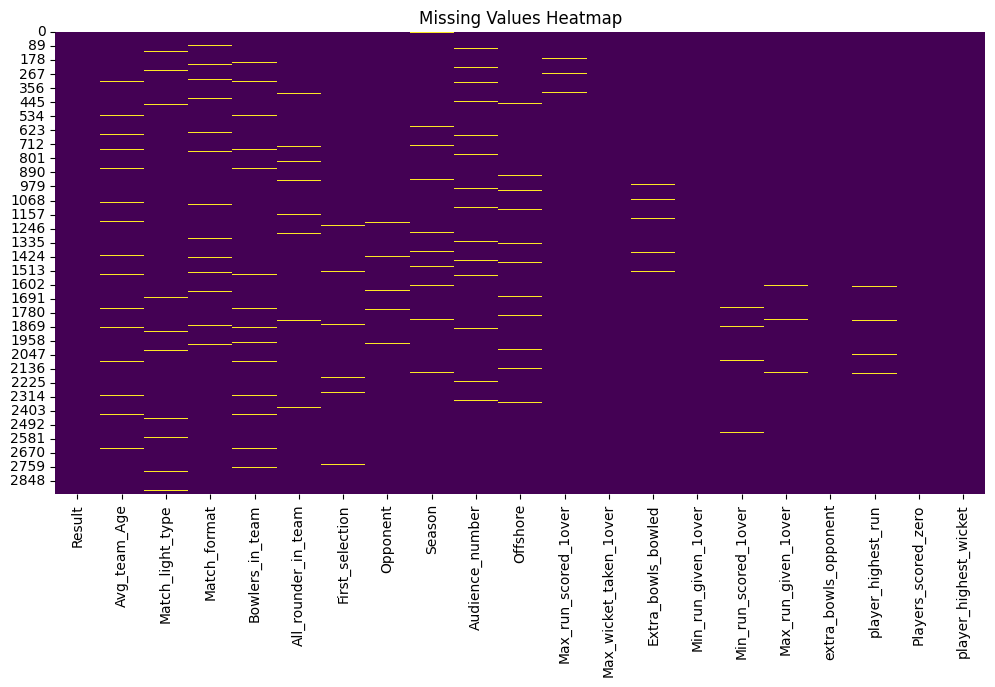

In [136]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

 **Missing value treatment using KNN**

In [137]:
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])), columns=df.select_dtypes(include=['float64', 'int64']).columns)
df[df_imputed.columns] = df_imputed
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [138]:
df.isna().sum()

,0
Result,0
Avg_team_Age,0
Match_light_type,0
Match_format,0
Bowlers_in_team,0
All_rounder_in_team,0
First_selection,0
Opponent,0
Season,0
Audience_number,0


In [139]:
# Standardize 'First_selection' column
if 'First_selection' in df.columns:
    df['First_selection'] = df['First_selection'].str.lower().replace({'bat': 'batting', 'bow': 'bowling'})

In [140]:
# Changing player_highest_wicket column data type to numeric
df['player_highest_wicket'] = pd.to_numeric(df['player_highest_wicket'], errors='coerce')

In [141]:
# Changing Players_scored_zero column data type to numeric
df['Players_scored_zero'] = pd.to_numeric(df['Players_scored_zero'], errors='coerce')

#Univariate analysis


In [142]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [147]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [148]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [149]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

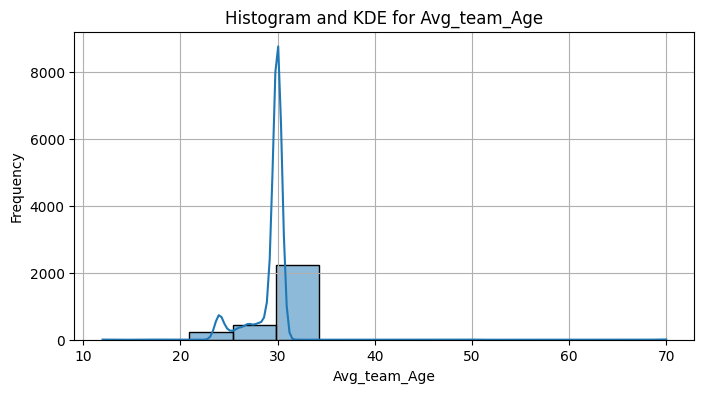

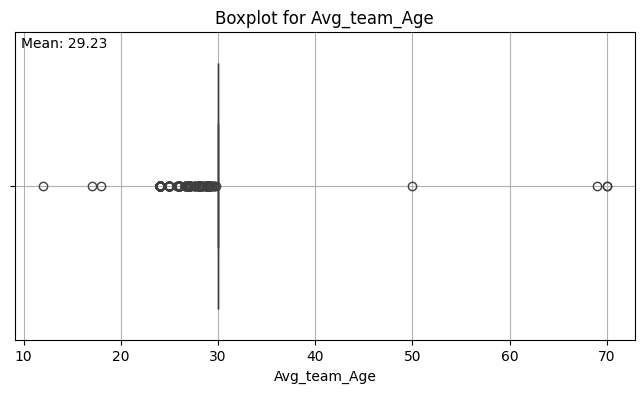

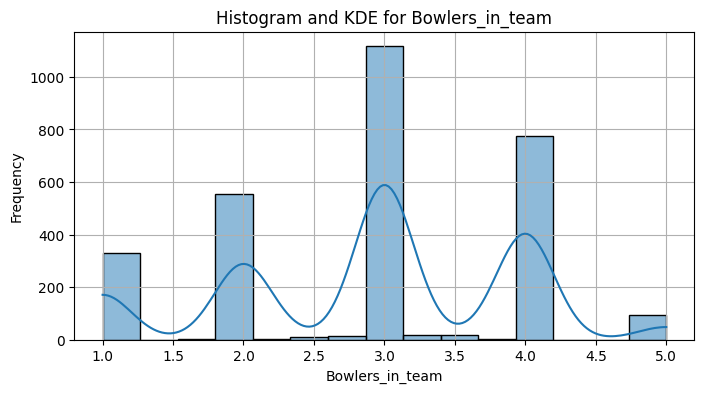

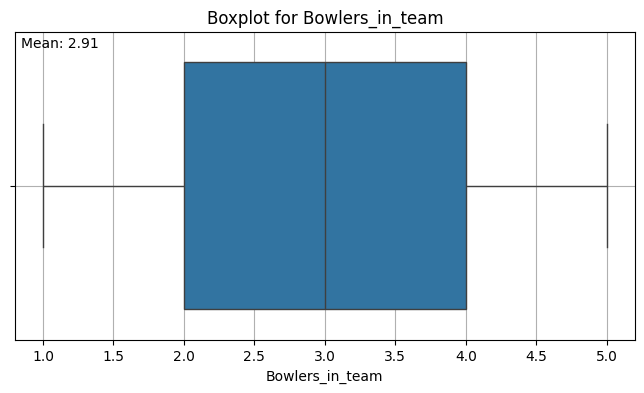

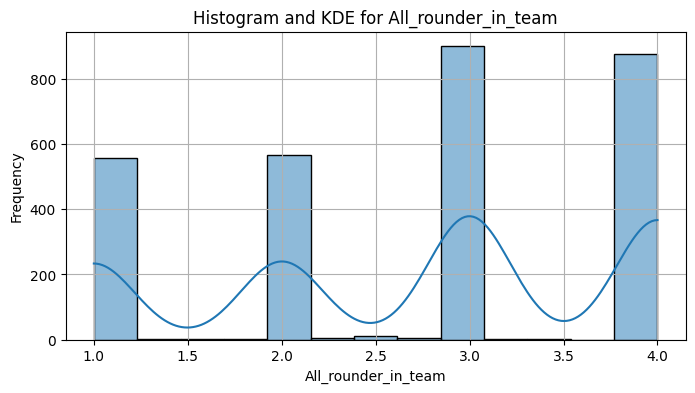

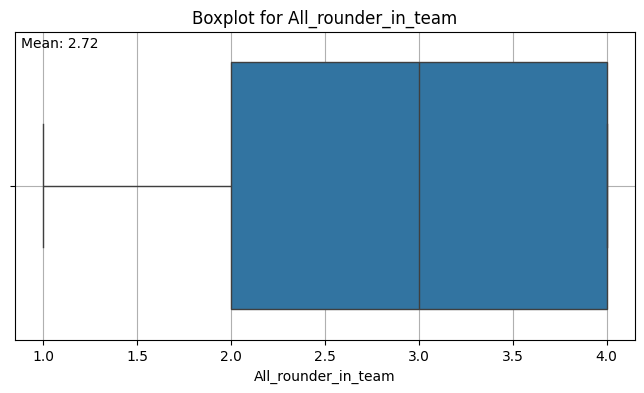

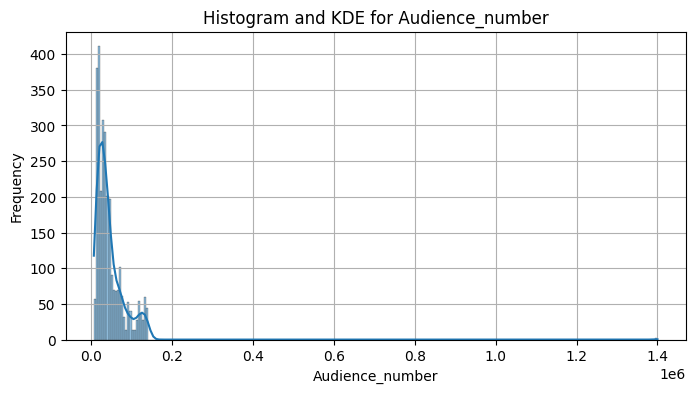

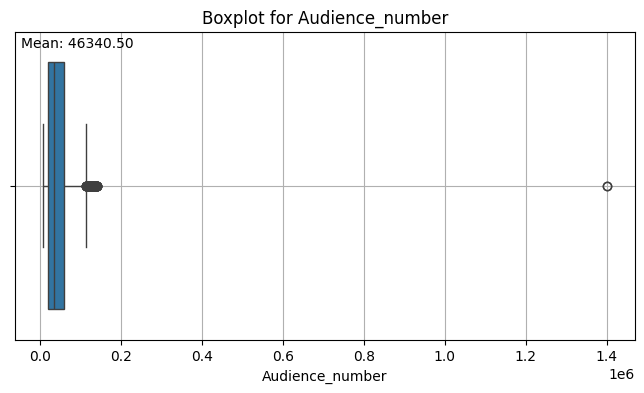

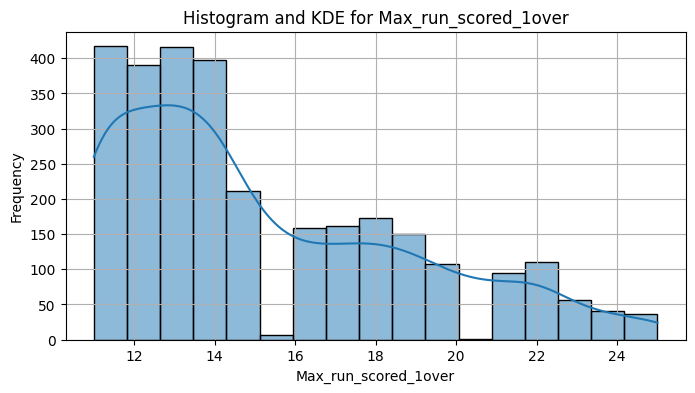

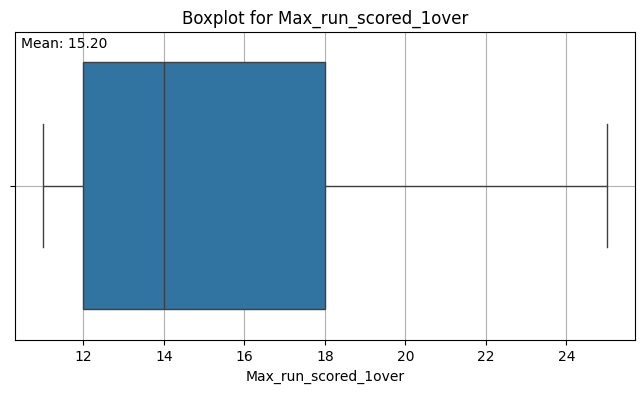

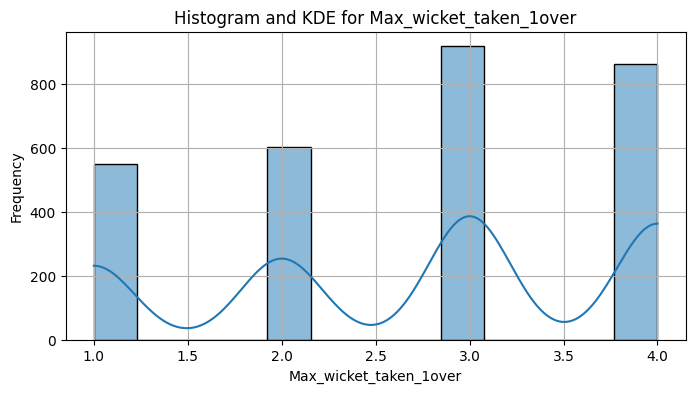

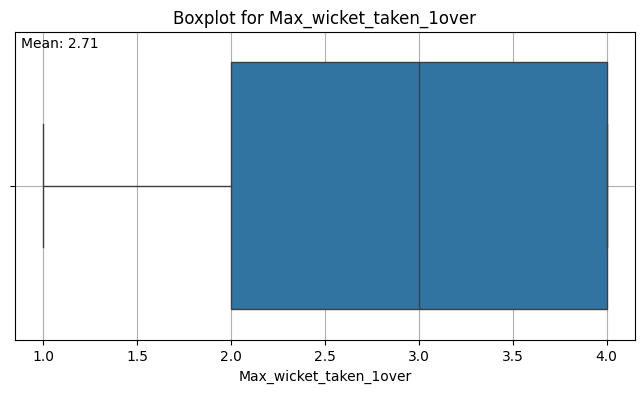

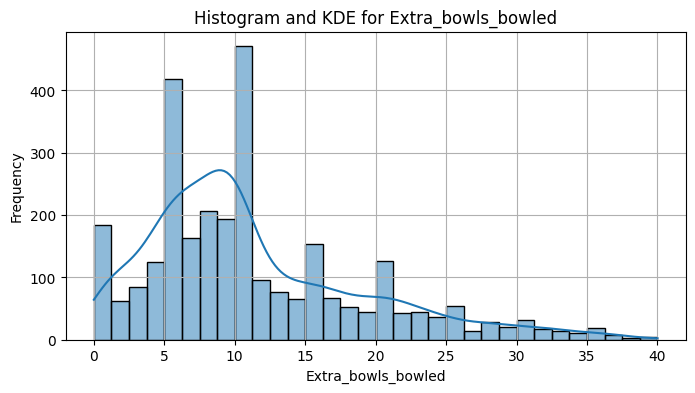

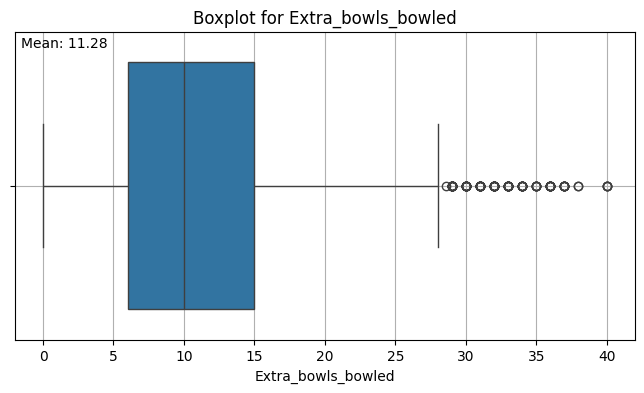

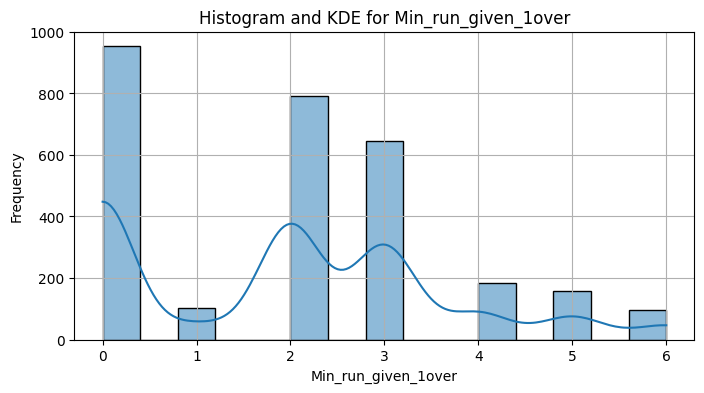

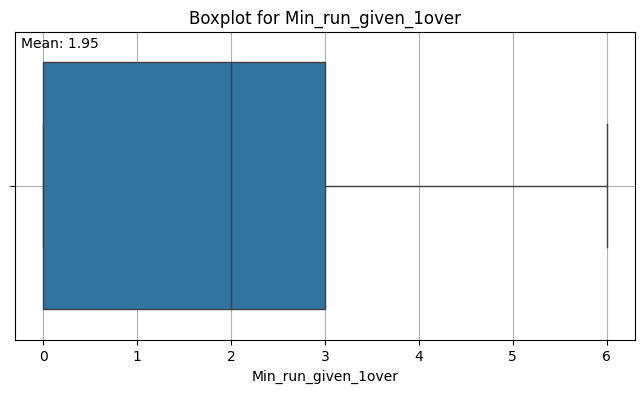

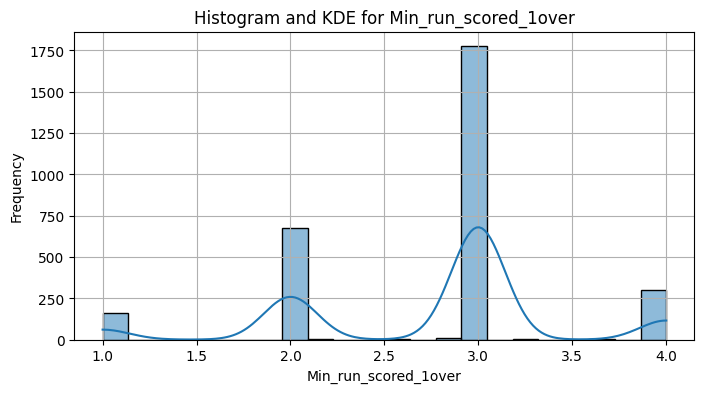

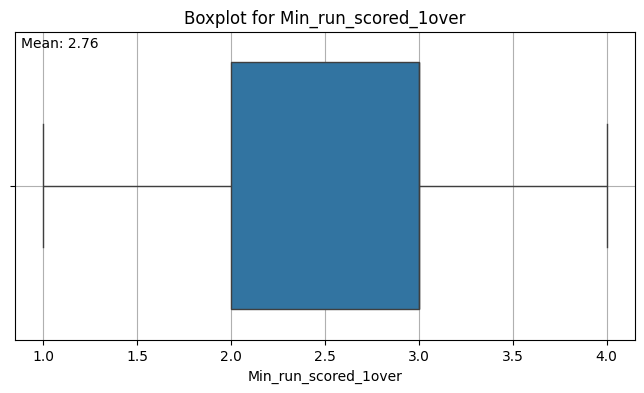

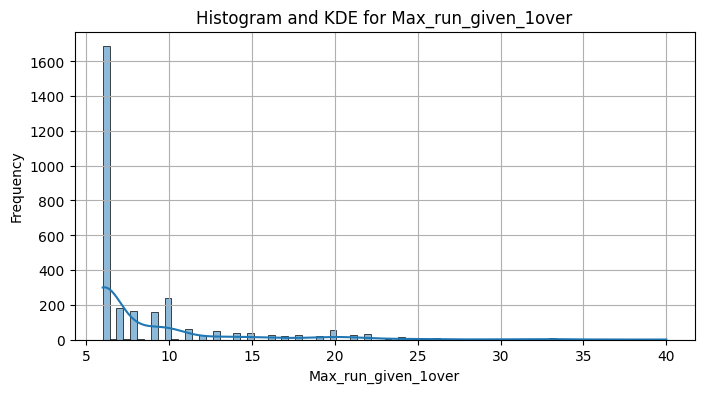

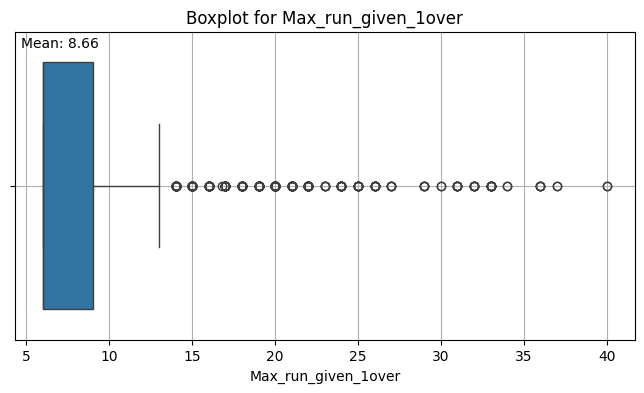

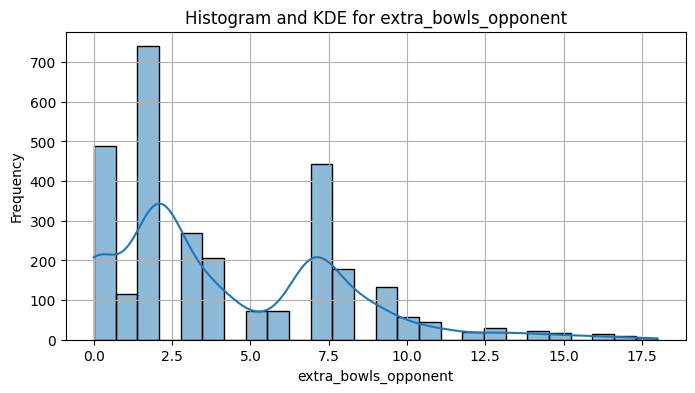

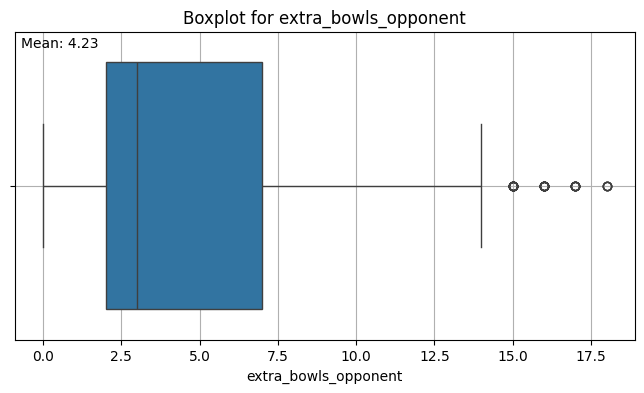

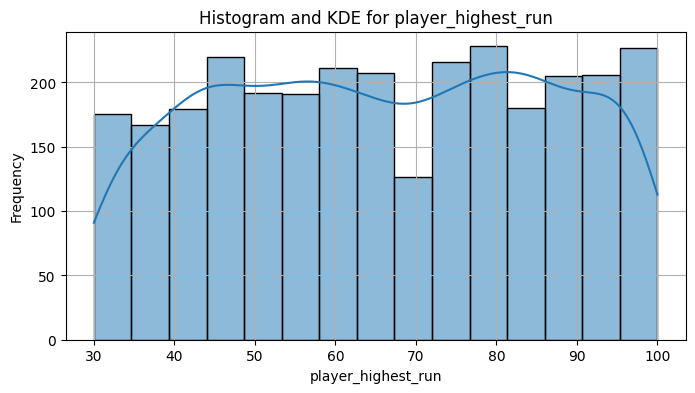

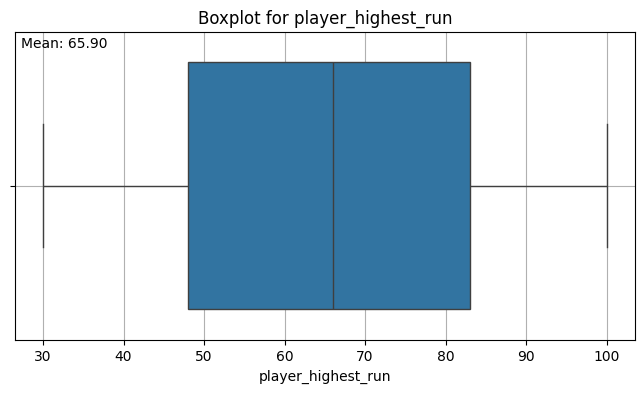

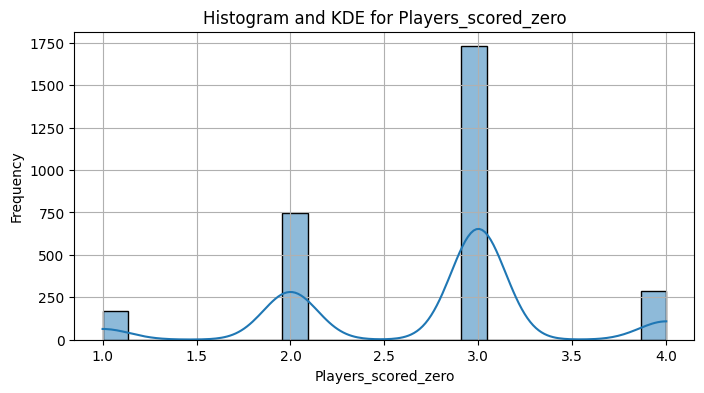

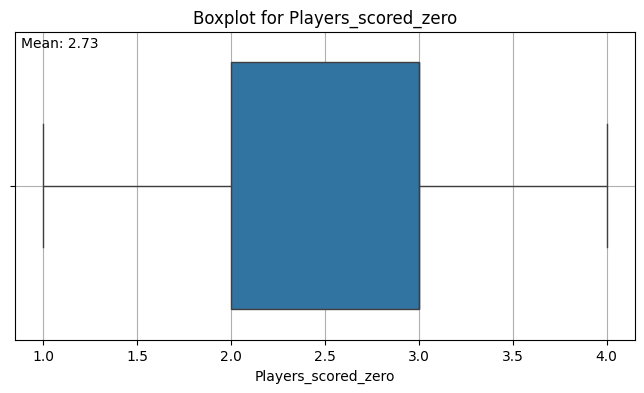

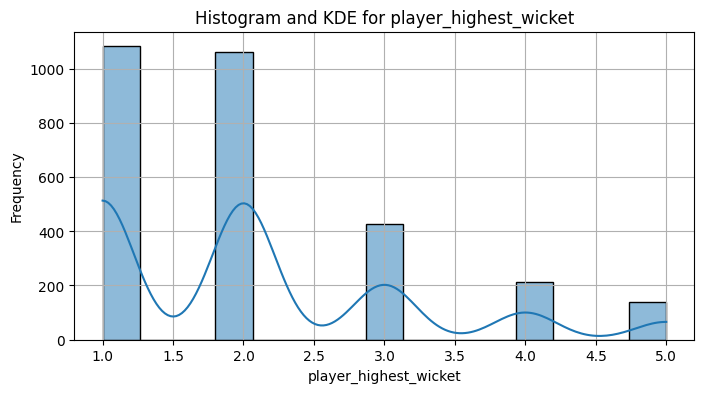

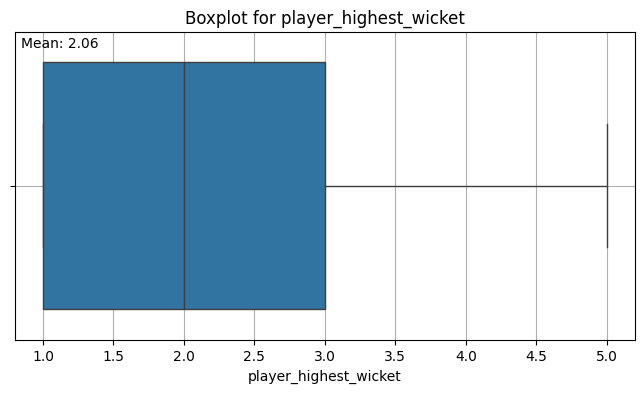

In [154]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram and KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.text(0.01, 0.95, f'Mean: {df[col].mean():.2f}', transform=plt.gca().transAxes)
    plt.show()

catogorical


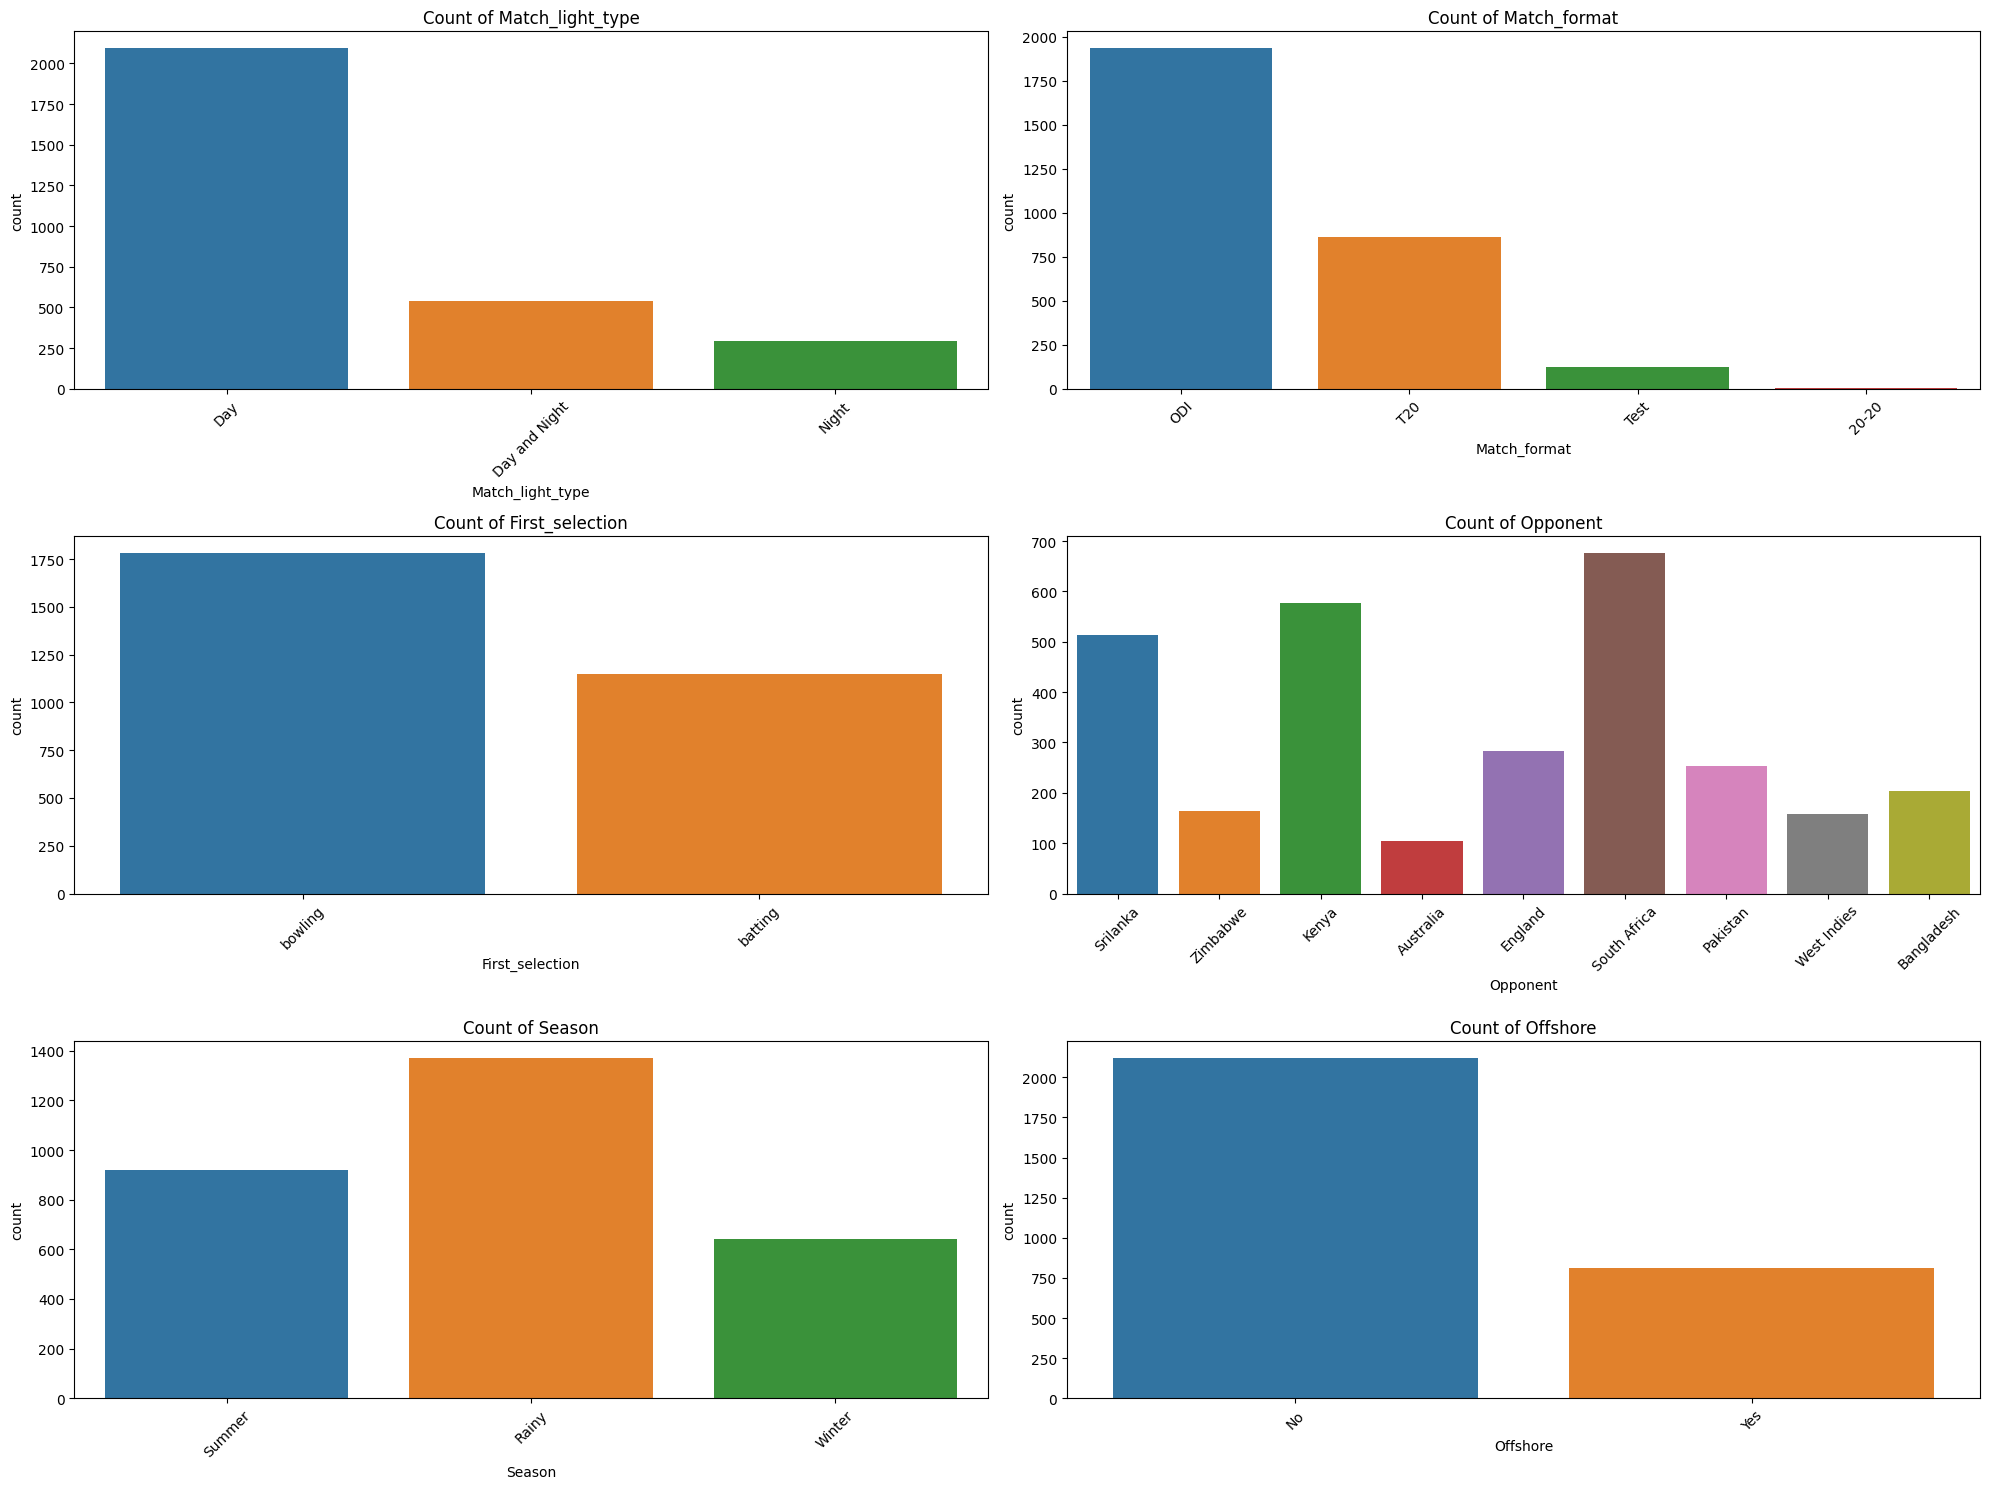

In [162]:
#Distribution of categorical variables
categorical_vars = ['Match_light_type', 'Match_format', 'First_selection', 'Opponent', 'Season', 'Offshore']
plt.figure(figsize=(20, 15))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=var, palette="tab10")
    plt.title(f'Count of {var}')
    plt.xticks(rotation=45)
    # Function to add value labels on top of bars
plt.tight_layout()
plt.savefig('univariate_categorical.png')
plt.show()

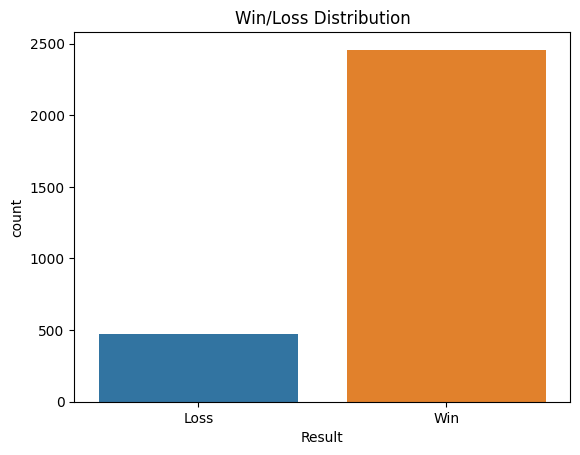

In [163]:
# Distribution of Target Variable
sns.countplot(x='Result', data=df, palette="tab10")
plt.title('Win/Loss Distribution')
plt.show()

Bivariate analysis


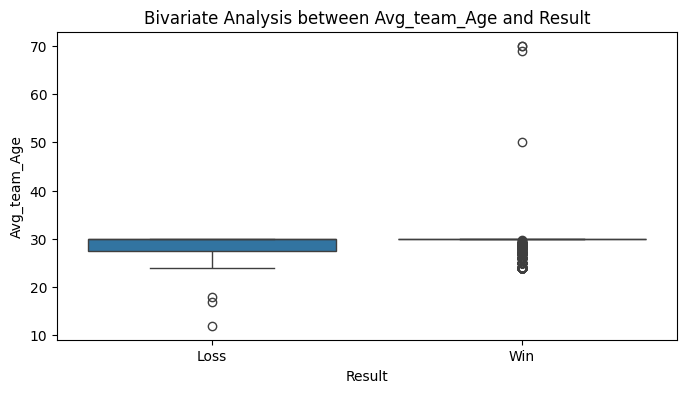

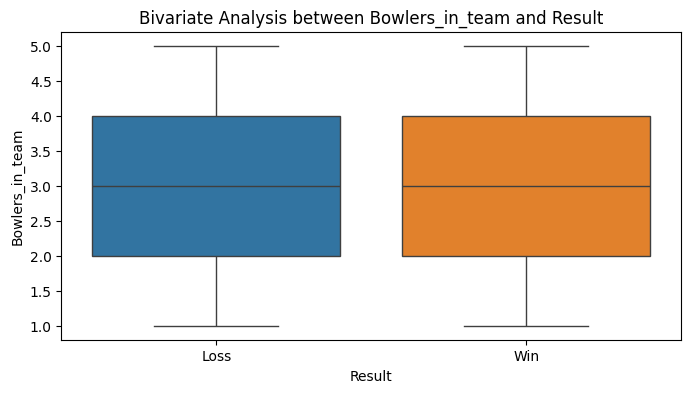

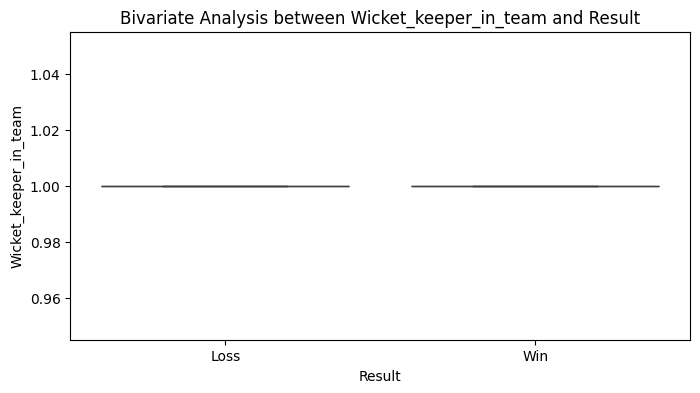

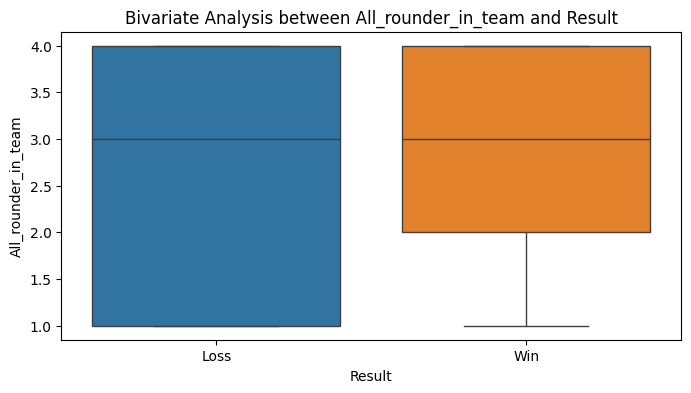

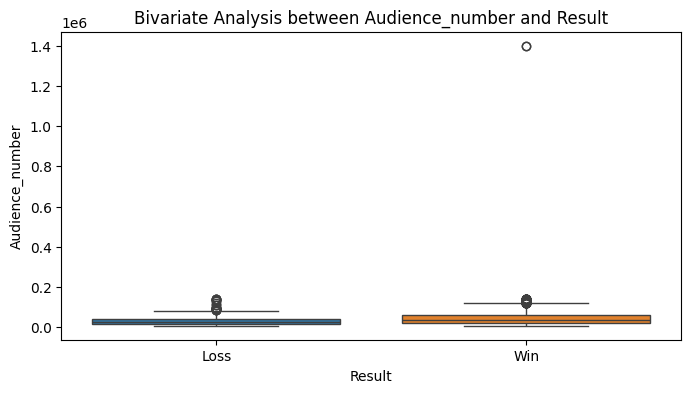

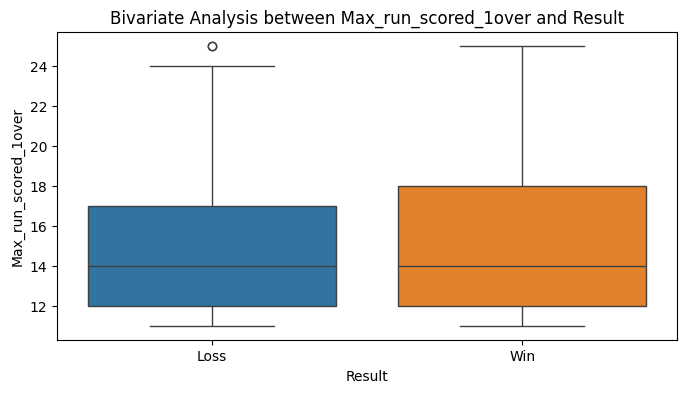

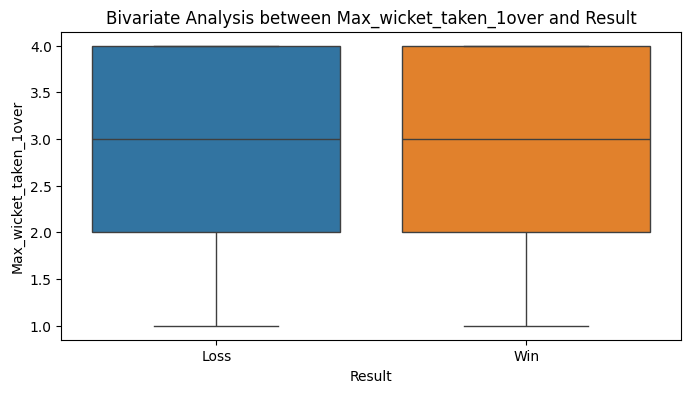

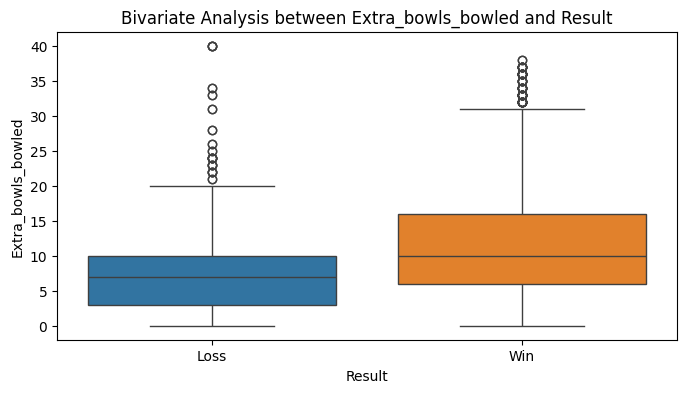

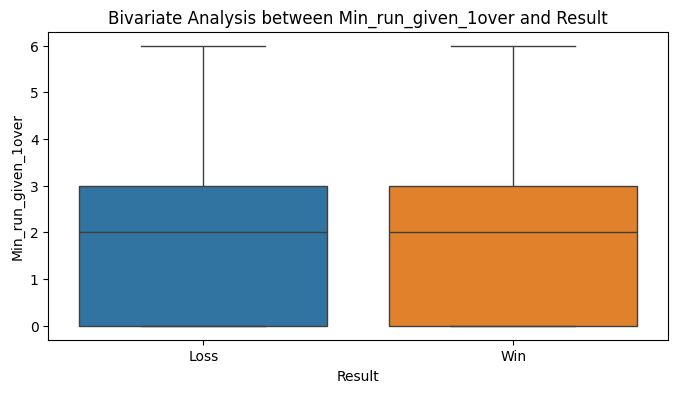

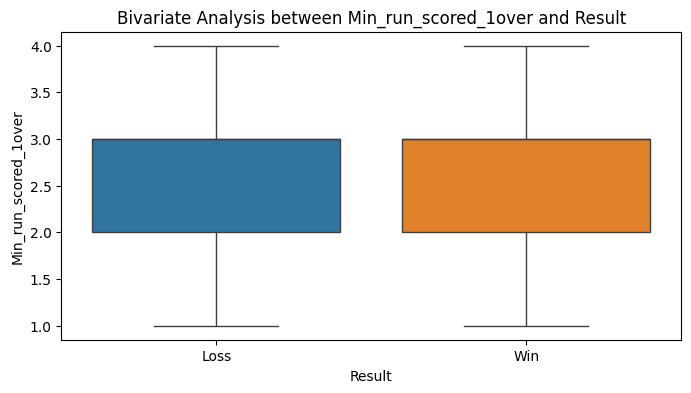

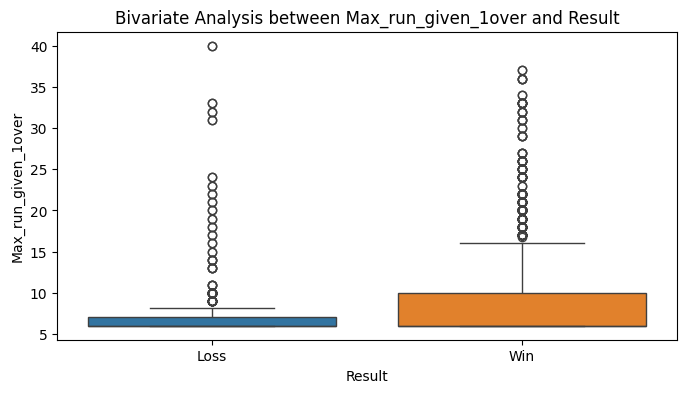

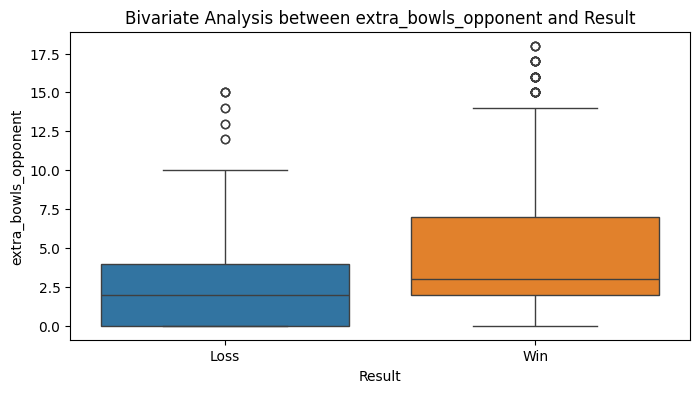

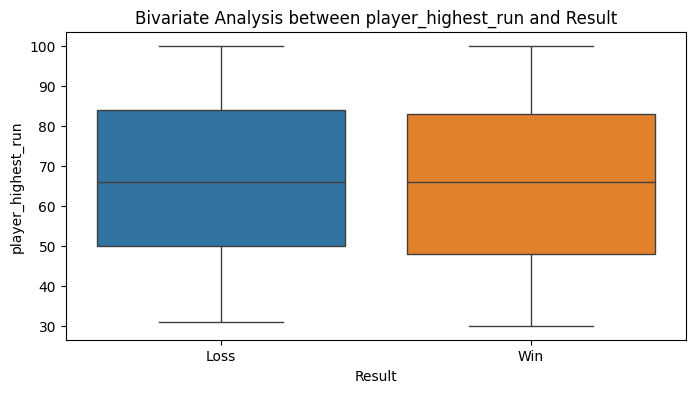

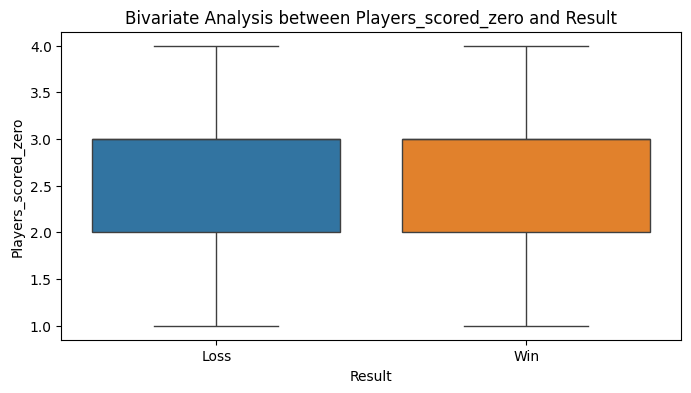

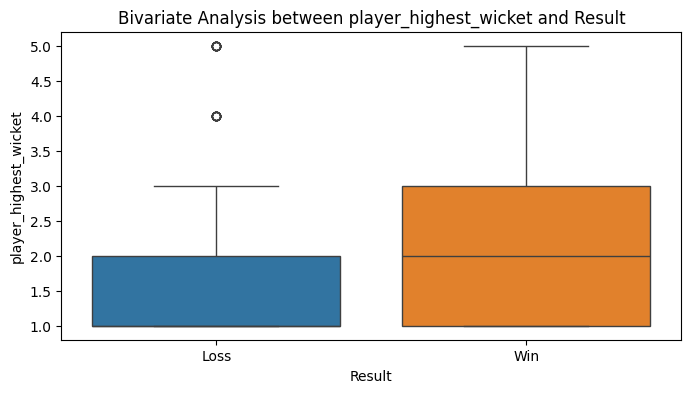

In [81]:
# Numerical variables vs Target
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Result', y=col, data=df, palette="tab10")
    plt.title(f'Bivariate Analysis between {col} and Result')
    plt.xlabel('Result')
    plt.ylabel(col)
    plt.show()

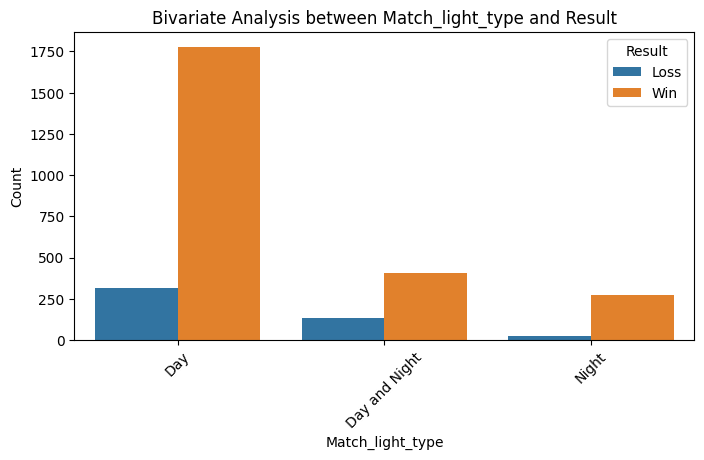

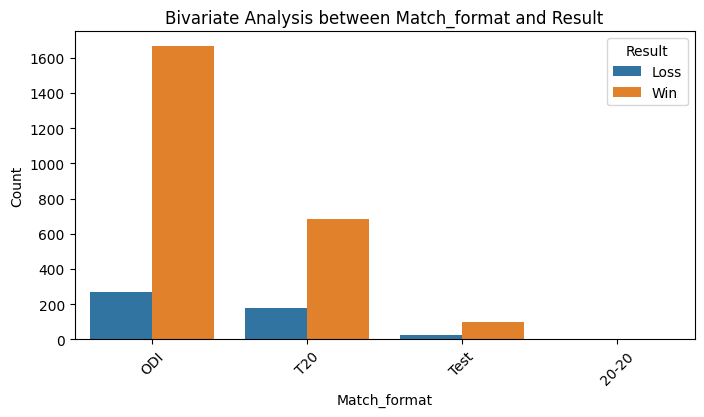

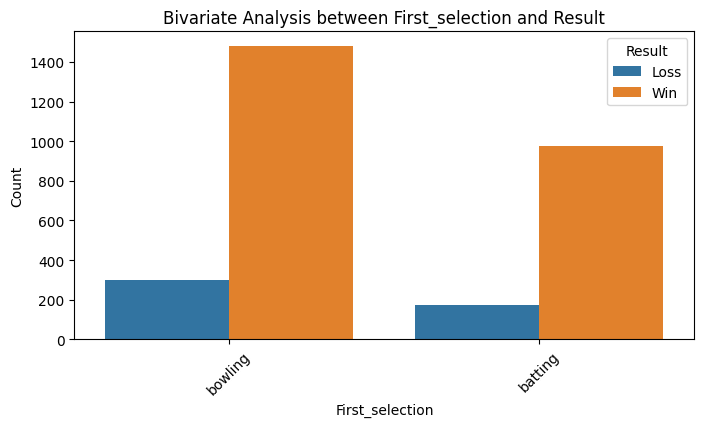

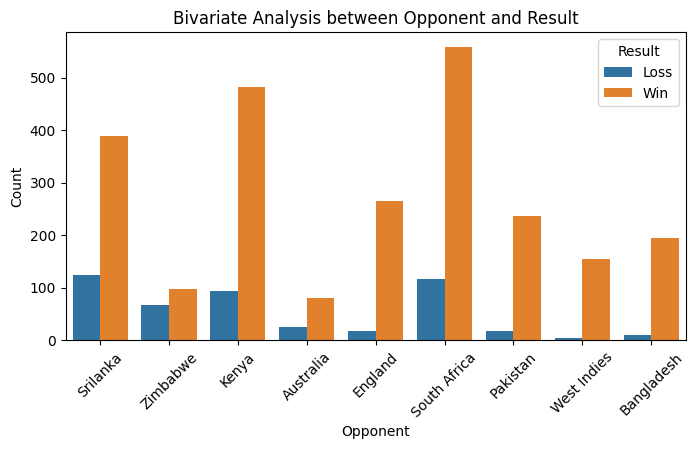

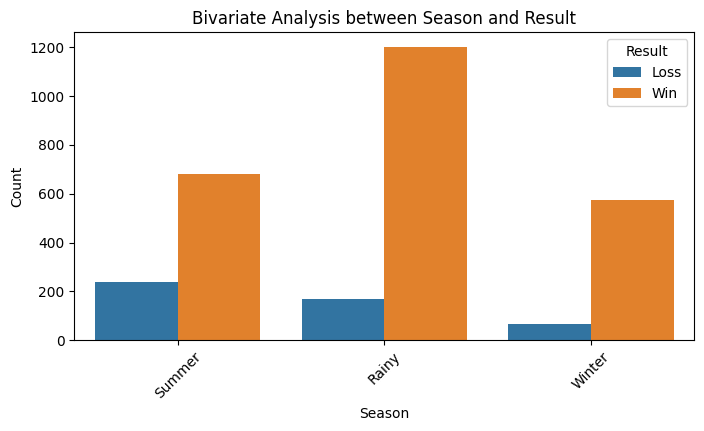

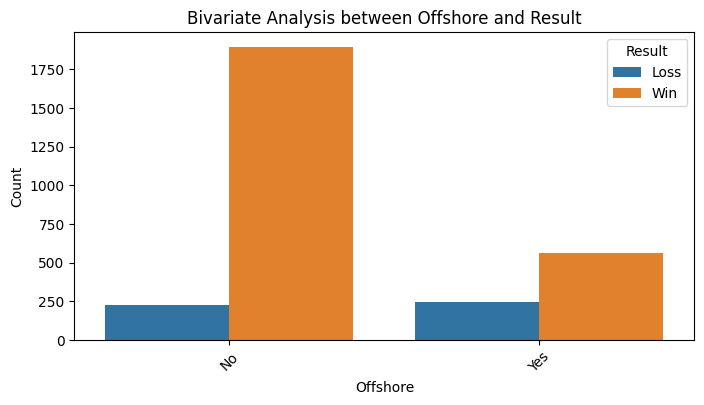

In [82]:
# Categorical variables vs Target
for col in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Result', data=df)
    plt.title(f'Bivariate Analysis between {col} and Result')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Multivariate analysis


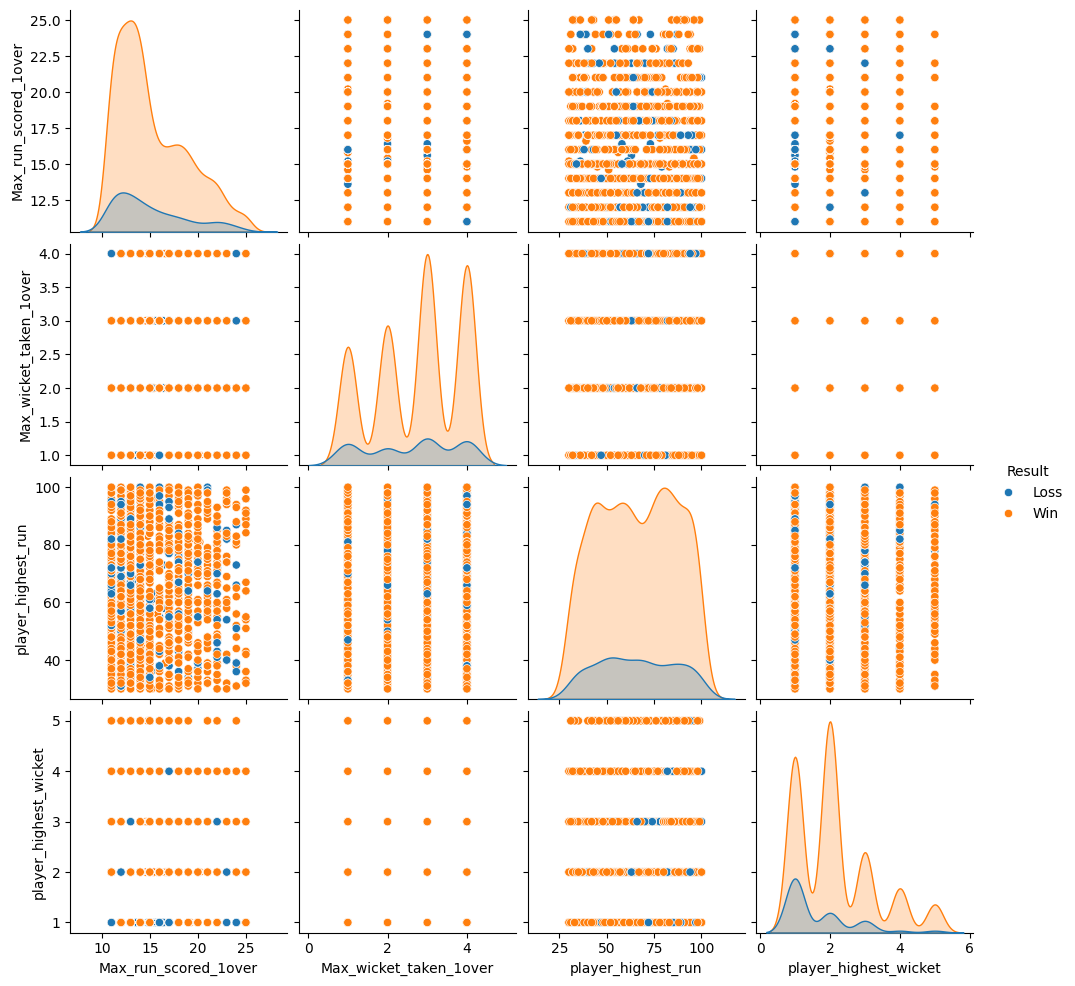

In [89]:
# Pairplot for few important features
important_features = ['Max_run_scored_1over', 'Max_wicket_taken_1over', 'player_highest_run', 'player_highest_wicket']
sns.pairplot(df[important_features + ['Result']], hue='Result')
plt.show()


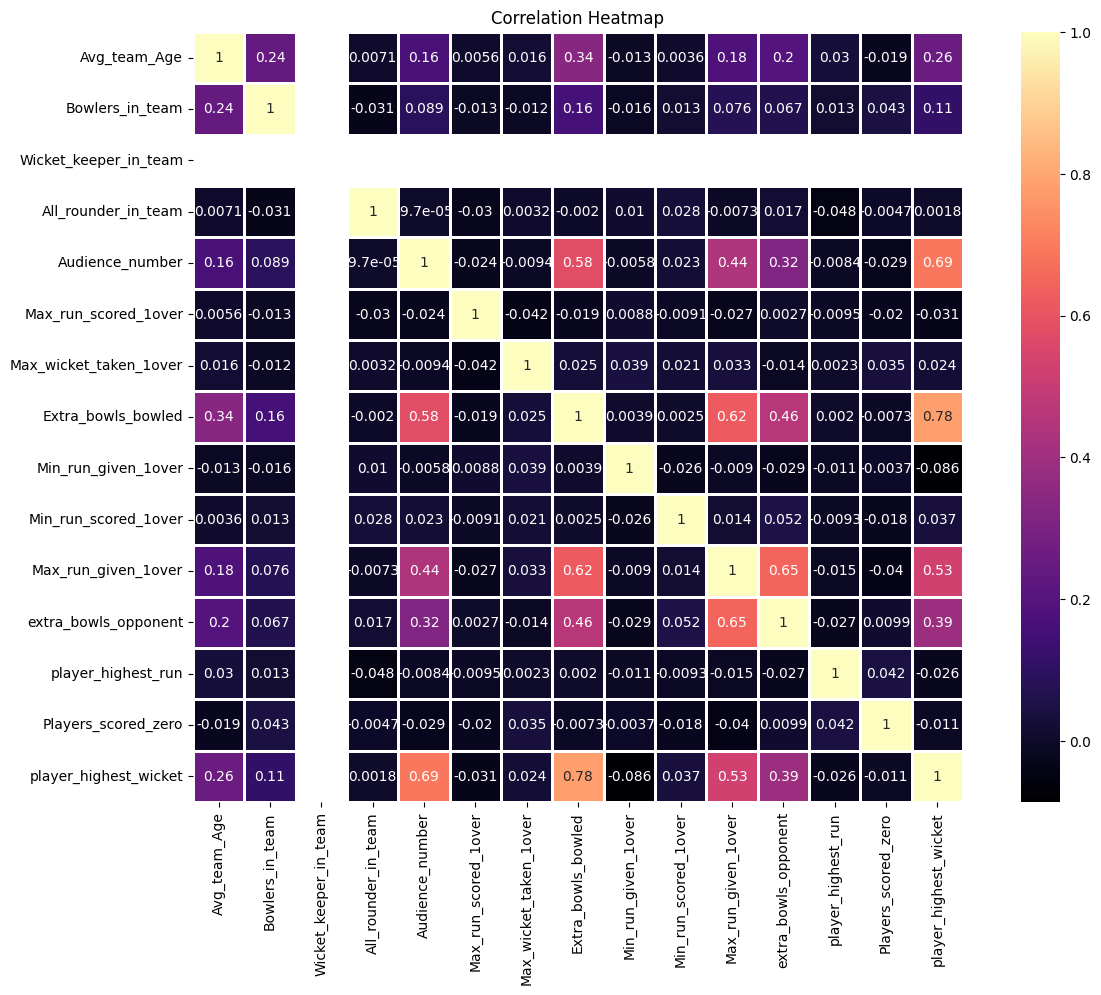

In [88]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='magma',square=True, linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

#Chi-square for Categorical vs Target

In [90]:
#Import the stats module
from scipy import stats

# Define categorical_cols by selecting object type columns from the DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    # Corrected the target variable name to 'Result'
    if col != 'Result':
        contingency = pd.crosstab(df[col], df['Result'])
        # Check if the contingency table is empty
        if contingency.empty:
            print(f"Skipping Chi-square Test for {col} vs Result: Contingency table is empty.")
            continue  # Move to the next column
        chi2, p, dof, expected = stats.chi2_contingency(contingency)
        print(f"Chi-square Test for {col} vs Result: p-value = {p:.4f}")

Chi-square Test for Match_light_type vs Result: p-value = 0.0000
Chi-square Test for Match_format vs Result: p-value = 0.0001
Chi-square Test for First_selection vs Result: p-value = 0.1817
Chi-square Test for Opponent vs Result: p-value = 0.0000
Chi-square Test for Season vs Result: p-value = 0.0000
Chi-square Test for Offshore vs Result: p-value = 0.0000


In [91]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np # Import numpy

# Re-define numeric_cols based on the current state of df
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    # Ensure 'Result' is not included in the independent variables for ANOVA
    if col != 'Result':
        # Check for sufficient unique values in the categorical predictor
        # The target variable is 'Result', which has 'Win' and 'Loss'
        if df['Result'].nunique() > 1:
            try:
                # Use 'Result' as the categorical predictor in the formula
                model = smf.ols(f'{col} ~ C(Result)', data=df).fit()
                anova_table = sm.stats.anova_lm(model, typ=2)
                print(f"ANOVA for {col} by Match Result:")
                print(anova_table)
            except Exception as e:
                 print(f"Could not perform ANOVA for {col}: {e}")
        else:
            print(f"Skipping ANOVA for {col} due to insufficient unique values in 'Result'")

ANOVA for Avg_team_Age by Match Result:
                 sum_sq      df          F        PR(>F)
C(Result)    358.639077     1.0  73.374382  1.706469e-17
Residual   14311.469265  2928.0        NaN           NaN
ANOVA for Bowlers_in_team by Match Result:
                sum_sq      df         F    PR(>F)
C(Result)     4.387977     1.0  4.278418  0.038687
Residual   3002.978303  2928.0       NaN       NaN
ANOVA for Wicket_keeper_in_team by Match Result:
                 sum_sq      df            F  PR(>F)
C(Result)  1.712691e-26     1.0  2908.814555     0.0
Residual   1.723988e-26  2928.0          NaN     NaN
ANOVA for All_rounder_in_team by Match Result:
                sum_sq      df          F        PR(>F)
C(Result)    33.363947     1.0  28.506519  1.005273e-07
Residual   3426.922688  2928.0        NaN           NaN
ANOVA for Audience_number by Match Result:
                 sum_sq      df          F        PR(>F)
C(Result)  9.038735e+10     1.0  39.500455  3.767667e-10
Residual   6.

In [164]:
# Outlier treatment
outlier_features = ['player_highest_run', 'player_highest_wicket', 'Max_run_scored_1over', 'Max_wicket_taken_1over']
for col in outlier_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


In [165]:
# label encoding and scaling
X = df.drop(columns=['Result'])
y = df['Result']
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    X[col] = X[col].astype(str)
encoders = {col: LabelEncoder().fit(X[col]) for col in cat_cols}
for col, encoder in encoders.items():
    X[col] = encoder.transform(X[col])
scaler = StandardScaler()
X[X.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))



In [166]:
# Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

Number of Clusters: 1 	Average Distortion: 4.310057108757736
Number of Clusters: 2 	Average Distortion: 4.0921959737785665
Number of Clusters: 3 	Average Distortion: 3.940440010767883
Number of Clusters: 4 	Average Distortion: 3.8764921216580785
Number of Clusters: 5 	Average Distortion: 3.821631696951531
Number of Clusters: 6 	Average Distortion: 3.7728650626975977
Number of Clusters: 7 	Average Distortion: 3.7187743177859414
Number of Clusters: 8 	Average Distortion: 3.6918271617209344


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

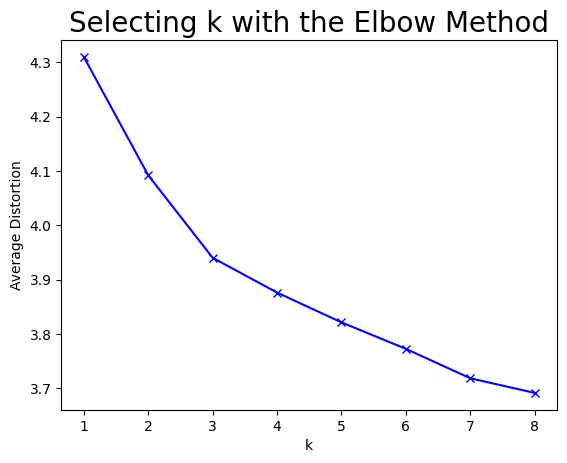

In [168]:
clusters = range(1, 9)
meanDistortions = []

# Assuming 'X' is your scaled dataframe, select the subset of features if needed
# Replace 'relevant_features' with the actual columns you want to use for clustering
relevant_features = X.columns  # or specify a list of columns like ['col1', 'col2', ...]
subset_scaled_df = X[relevant_features]

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

For n_clusters = 2, silhouette score is 0.15790128857639404
For n_clusters = 3, silhouette score is 0.0901411096663509
For n_clusters = 4, silhouette score is 0.07783413714202536
For n_clusters = 5, silhouette score is 0.072869665816857
For n_clusters = 6, silhouette score is 0.05813926223244775
For n_clusters = 7, silhouette score is 0.0566593686963589
For n_clusters = 8, silhouette score is 0.06579027470845236
For n_clusters = 9, silhouette score is 0.062471038810772046


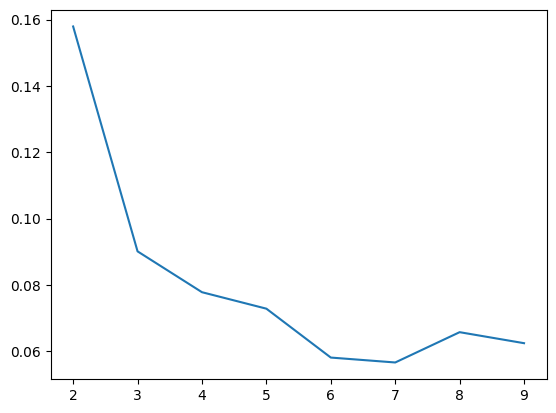

In [169]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

In [170]:
# Clustering analysis
imputer = SimpleImputer(strategy='mean') # or 'median', depending on your preference
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
df['Cluster'] = kmeans_labels


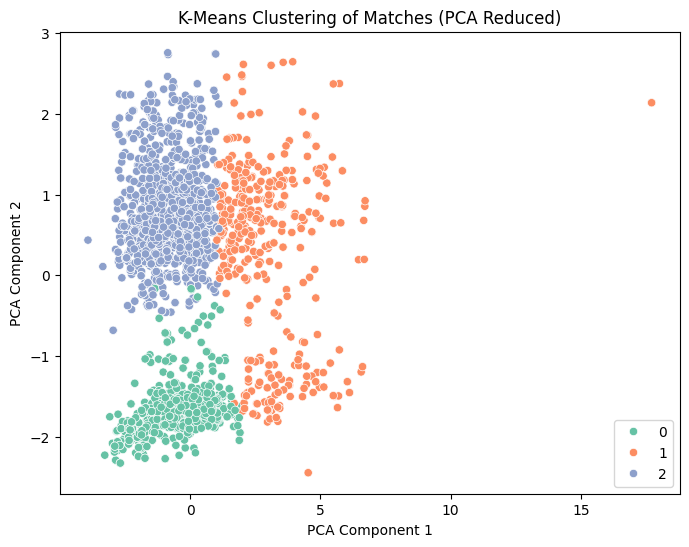

In [171]:
# Plot PCA Clusters
os.makedirs("graphs", exist_ok=True)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set2')
plt.title("K-Means Clustering of Matches (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig("graphs/kmeans_clusters_pca.png")
plt.show()

In [172]:
# Cluster Profiling
numeric_only = ['player_highest_run', 'player_highest_wicket', 'Max_run_scored_1over', 'Max_wicket_taken_1over']
print(df.groupby('Cluster')[numeric_only].mean())

         player_highest_run  player_highest_wicket  Max_run_scored_1over  \
Cluster                                                                    
0                 65.181287               1.934195             15.032515   
1                 65.636458               3.692708             15.152083   
2                 66.408406               1.505348             15.321548   

         Max_wicket_taken_1over  
Cluster                          
0                      2.673684  
1                      2.812500  
2                      2.699133  


In [174]:
# Win rate per cluster
print("\nWin/Loss Distribution by Cluster:")
print(df.groupby('Cluster')['Result'].value_counts(normalize=True).unstack())


Win/Loss Distribution by Cluster:
Result       Loss       Win
Cluster                    
0        0.222222  0.777778
1        0.062500  0.937500
2        0.164777  0.835223


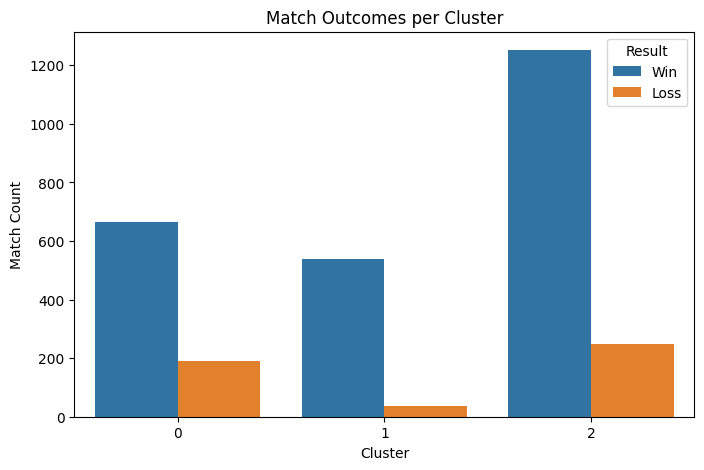

In [175]:
# Visual outcome
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', hue='Result', data=df)
plt.title("Match Outcomes per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Match Count")
plt.savefig("graphs/cluster_win_distribution.png")
plt.show()

In [176]:
# Add cluster as feature
X['Cluster'] = df['Cluster']

**c) Business insights**

- Higher Max_run_scored_1over correlates with wins.
- Matches in Rainy season have more losses, possibly due to weather affecting

#1.Model building

##Logistic regression

In [184]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [177]:
from sklearn.linear_model import LogisticRegression
# Create an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
# Fit the imputer on your training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train) # Fit and transform on X_train
X_test_imputed = imputer.transform(X_test) # Transform X_test using the fitted imputer

# Train logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_imputed, y_train) # Fit the model using imputed X_train

# Predict and evaluate
logreg_y_pred = logreg_model.predict(X_test_imputed) # Predict using imputed X_test
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)

logreg_accuracy

0.8498293515358362

In [178]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean') # Create an instance of SimpleImputer
X_train = imputer.fit_transform(X_train) # Fit and transform on X_train
X_test = imputer.transform(X_test) # Transform X_test using the fitted imputer


# Train logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predictions for both train and test sets
y_train_pred_logreg = logreg_model.predict(X_train)
y_train_probs_logreg = logreg_model.predict_proba(X_train)[:, 1]

y_test_pred_logreg = logreg_model.predict(X_test)
y_test_probs_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Metrics for train
train_precision_logreg = precision_score(y_train, y_train_pred_logreg, pos_label='Win')
train_recall_logreg = recall_score(y_train, y_train_pred_logreg, pos_label='Win')
train_f1_logreg = f1_score(y_train, y_train_pred_logreg, pos_label='Win')
train_auc_logreg = roc_auc_score(y_train, y_train_probs_logreg)
train_report_logreg = classification_report(y_train, y_train_pred_logreg, output_dict=True)

# Metrics for test
test_precision_logreg = precision_score(y_test, y_test_pred_logreg, pos_label='Win')
test_recall_logreg = recall_score(y_test, y_test_pred_logreg, pos_label='Win')
test_f1_logreg = f1_score(y_test, y_test_pred_logreg, pos_label='Win')
test_auc_logreg = roc_auc_score(y_test, y_test_probs_logreg)
test_report_logreg = classification_report(y_test, y_test_pred_logreg, output_dict=True)

# Create summary table
logreg_summary = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'Accuracy': [train_report_logreg['accuracy'], test_report_logreg['accuracy']],
    'Precision': [train_precision_logreg, test_precision_logreg],
    'Recall': [train_recall_logreg, test_recall_logreg],
    'F1 Score': [train_f1_logreg, test_f1_logreg],
    'AUC': [train_auc_logreg, test_auc_logreg]
})

# Display the table using display() directly
display(logreg_summary)

,Set,Accuracy,Precision,Recall,F1 Score,AUC
0,Train,0.858362,0.869546,0.978734,0.920915,0.796726
1,Test,0.849829,0.856884,0.981328,0.914894,0.798177


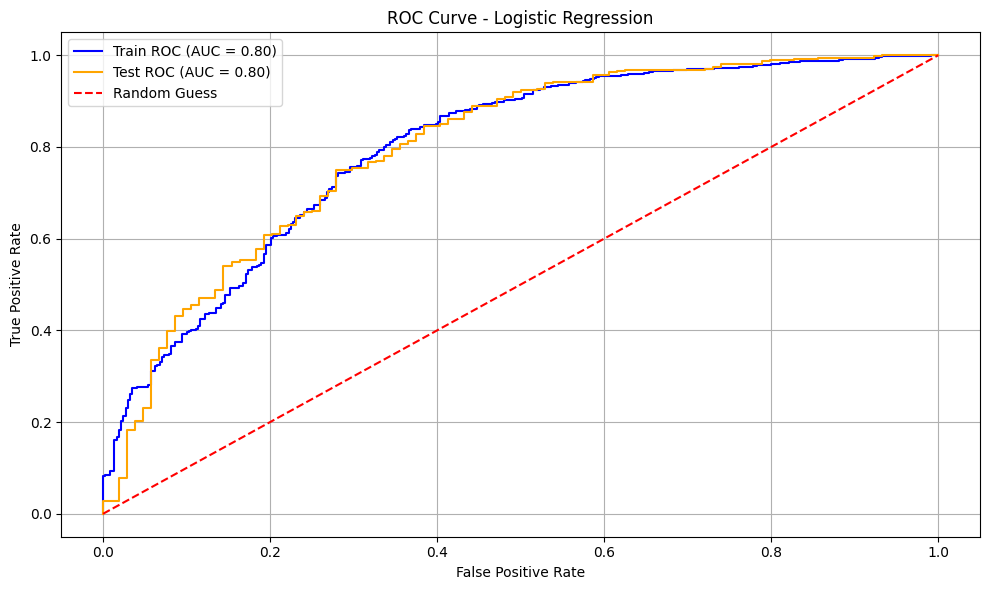

In [190]:
# ROC curve for logistic regression (train and test)
train_fpr_logreg, train_tpr_logreg, _ = roc_curve(y_train, y_train_probs_logreg, pos_label='Win')
test_fpr_logreg, test_tpr_logreg, _ = roc_curve(y_test, y_test_probs_logreg, pos_label='Win')

plt.figure(figsize=(10, 6))
plt.plot(train_fpr_logreg, train_tpr_logreg, label=f'Train ROC (AUC = {train_auc_logreg:.2f})', color='blue')
plt.plot(test_fpr_logreg, test_tpr_logreg, label=f'Test ROC (AUC = {test_auc_logreg:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()

Naive Bayes classifier

In [191]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 🧠 Step 7: Train Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 🔍 Step 8: Predict and Evaluate
y_train_pred = nb_model.predict(X_train)
y_train_probs = nb_model.predict_proba(X_train)[:, 1]

y_test_pred = nb_model.predict(X_test)
y_test_probs = nb_model.predict_proba(X_test)[:, 1]

# Convert y_train, y_test, y_train_pred, and y_test_pred to numerical labels (0 and 1)
y_train_numeric = y_train.map({'Loss': 0, 'Win': 1})
y_test_numeric = y_test.map({'Loss': 0, 'Win': 1})
y_train_pred_numeric = pd.Series(y_train_pred).map({'Loss': 0, 'Win': 1}).values
y_test_pred_numeric = pd.Series(y_test_pred).map({'Loss': 0, 'Win': 1}).values

# Compute metrics for train using numerical labels
train_precision = precision_score(y_train_numeric, y_train_pred_numeric)
train_recall = recall_score(y_train_numeric, y_train_pred_numeric)
train_f1 = f1_score(y_train_numeric, y_train_pred_numeric)
train_auc = roc_auc_score(y_train_numeric, y_train_probs)  # Use y_train_numeric for AUC
train_report = classification_report(y_train, y_train_pred, output_dict=True)  # Still using original labels for report

# Compute metrics for test using numerical labels
test_precision = precision_score(y_test_numeric, y_test_pred_numeric)
test_recall = recall_score(y_test_numeric, y_test_pred_numeric)
test_f1 = f1_score(y_test_numeric, y_test_pred_numeric)
test_auc = roc_auc_score(y_test_numeric, y_test_probs)  # Use y_test_numeric for AUC
test_report = classification_report(y_test, y_test_pred, output_dict=True)  # Still using original labels for report

# Return all metrics
{
    "train": {
        "precision": train_precision,
        "recall": train_recall,
        "f1": train_f1,
        "auc": train_auc,
        "report": train_report
    },
    "test": {
        "precision": test_precision,
        "recall": test_recall,
        "f1": test_f1,
        "auc": test_auc,
        "report": test_report
    }
}

{'train': {'precision': 0.9118625277161863,
  'recall': 0.8329113924050633,
  'f1': 0.8706006880127017,
  'auc': np.float64(0.7700195533600905),
  'report': {'Loss': {'precision': 0.3888888888888889,
    'recall': 0.5691056910569106,
    'f1-score': 0.46204620462046203,
    'support': 369.0},
   'Win': {'precision': 0.9118625277161863,
    'recall': 0.8329113924050633,
    'f1-score': 0.8706006880127017,
    'support': 1975.0},
   'accuracy': 0.7913822525597269,
   'macro avg': {'precision': 0.6503757083025375,
    'recall': 0.7010085417309869,
    'f1-score': 0.6663234463165819,
    'support': 2344.0},
   'weighted avg': {'precision': 0.8295343396926058,
    'recall': 0.7913822525597269,
    'f1-score': 0.8062847305162272,
    'support': 2344.0}}},
 'test': {'precision': 0.8982300884955752,
  'recall': 0.8423236514522822,
  'f1': 0.8693790149892934,
  'auc': np.float64(0.7777888605170763),
  'report': {'Loss': {'precision': 0.43283582089552236,
    'recall': 0.5576923076923077,
    'f

In [192]:
# Create a summary DataFrame for output table
metrics_summary = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'Accuracy': [train_report['accuracy'], test_report['accuracy']],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1 Score': [train_f1, test_f1],
    'AUC': [train_auc, test_auc]
})

# Display the table
display(metrics_summary)

,Set,Accuracy,Precision,Recall,F1 Score,AUC
0,Train,0.791382,0.911863,0.832911,0.870601,0.770020
1,Test,0.791809,0.898230,0.842324,0.869379,0.777789


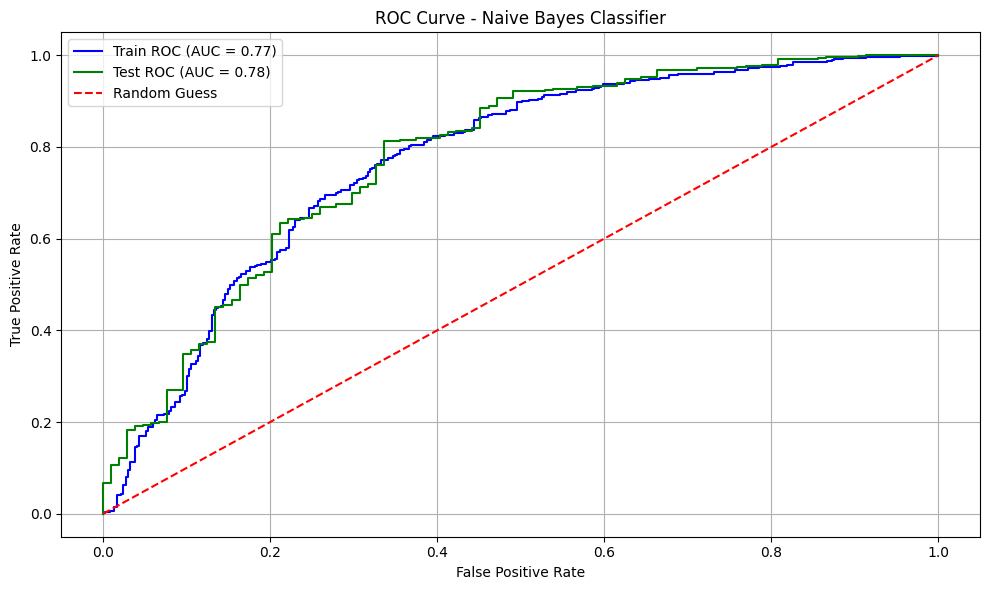

In [193]:
# Plot ROC curve for Naive Bayes model (Train and Test)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_probs, pos_label='Win') # Added pos_label='Win'
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_probs, pos_label='Win') # Added pos_label='Win'

plt.figure(figsize=(10, 6))
plt.plot(train_fpr, train_tpr, label=f'Train ROC (AUC = {train_auc:.2f})', color='blue')
plt.plot(test_fpr, test_tpr, label=f'Test ROC (AUC = {test_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.title('ROC Curve - Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Random forest classifier


In [194]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
y_train_probs = rf_model.predict_proba(X_train)[:, 1]
y_test_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
# Specify pos_label='Win' for precision, recall, and F1-score
train_metrics = {
    'Accuracy': rf_model.score(X_train, y_train),
    'Precision': precision_score(y_train, y_train_pred, pos_label='Win'),
    'Recall': recall_score(y_train, y_train_pred, pos_label='Win'),
    'F1 Score': f1_score(y_train, y_train_pred, pos_label='Win'),
    'AUC': roc_auc_score(y_train, y_train_probs)
}

test_metrics = {
    'Accuracy': rf_model.score(X_test, y_test),
    'Precision': precision_score(y_test, y_test_pred, pos_label='Win'),
    'Recall': recall_score(y_test, y_test_pred, pos_label='Win'),
    'F1 Score': f1_score(y_test, y_test_pred, pos_label='Win'),
    'AUC': roc_auc_score(y_test, y_test_probs)
}

In [111]:
rf_summary_df = pd.DataFrame([train_metrics, test_metrics], index=["Train", "Test"]).reset_index().rename(columns={'index': 'Set'})

# Display the results using display() directly
display(rf_summary_df)

,Set,Accuracy,Precision,Recall,F1 Score,AUC
0,Train,1.000000,1.000000,1.0,1.000000,1.000000
1,Test,0.962457,0.956349,1.0,0.977688,0.965947


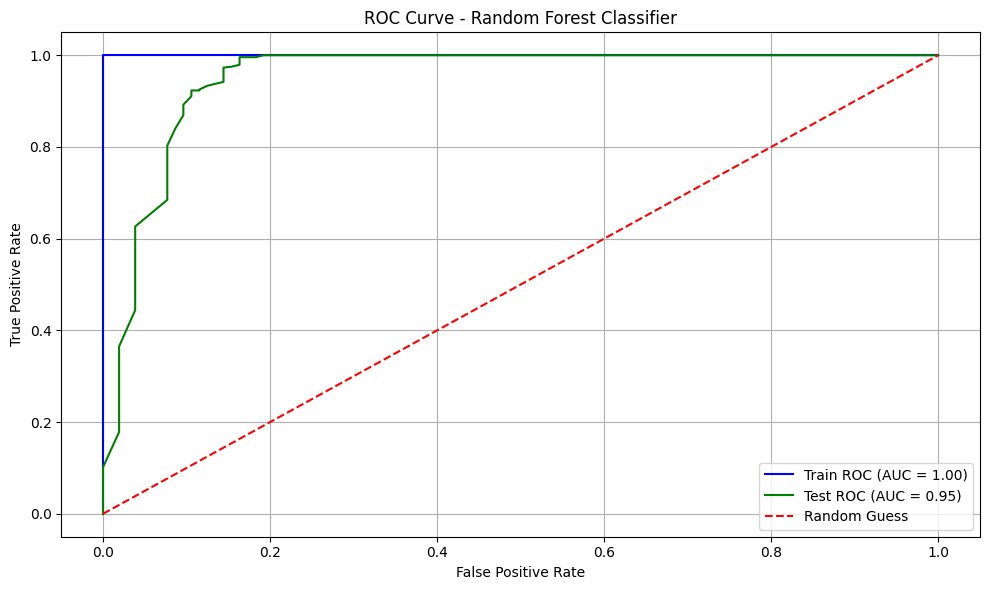

In [195]:
# ROC curves and AUCs
train_fpr_rf, train_tpr_rf, _ = roc_curve(y_train, y_train_probs, pos_label='Win') # Added pos_label='Win'
test_fpr_rf, test_tpr_rf, _ = roc_curve(y_test, y_test_probs, pos_label='Win') # Added pos_label='Win'

train_auc_rf = roc_auc_score(y_train, y_train_probs)
test_auc_rf = roc_auc_score(y_test, y_test_probs)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(train_fpr_rf, train_tpr_rf, label=f'Train ROC (AUC = {train_auc_rf:.2f})', color='blue')
plt.plot(test_fpr_rf, test_tpr_rf, label=f'Test ROC (AUC = {test_auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.title('ROC Curve - Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Xg boost classifier

In [196]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier # Import XGBClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the training target variable and transform both train and test
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Train XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred_xgb = xgb_model.predict(X_train)
y_train_probs_xgb = xgb_model.predict_proba(X_train)[:, 1]
y_test_pred_xgb = xgb_model.predict(X_test)
y_test_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
train_metrics_xgb = {
    'Accuracy': xgb_model.score(X_train, y_train),
    'Precision': precision_score(y_train, y_train_pred_xgb),
    'Recall': recall_score(y_train, y_train_pred_xgb),
    'F1 Score': f1_score(y_train, y_train_pred_xgb),
    'AUC': roc_auc_score(y_train, y_train_probs_xgb)
}

test_metrics_xgb = {
    'Accuracy': xgb_model.score(X_test, y_test),
    'Precision': precision_score(y_test, y_test_pred_xgb),
    'Recall': recall_score(y_test, y_test_pred_xgb),
    'F1 Score': f1_score(y_test, y_test_pred_xgb),
    'AUC': roc_auc_score(y_test, y_test_probs_xgb)
}

# Create summary DataFrame
xgb_summary_df = pd.DataFrame([train_metrics_xgb, test_metrics_xgb], index=["Train", "Test"]).reset_index().rename(columns={'index': 'Set'})

# Display
# Assuming you have a function like 'display_dataframe_to_user' defined elsewhere
# tools.display_dataframe_to_user(name="XGBoost Classifier ModelMetrics", dataframe=xgb_summary_df)
# If not, you can use 'display(xgb_summary_df)' instead
display(xgb_summary_df)

,Set,Accuracy,Precision,Recall,F1 Score,AUC
0,Train,1.000000,1.000000,1.000000,1.000000,1.000000
1,Test,0.950512,0.953908,0.987552,0.970438,0.951384


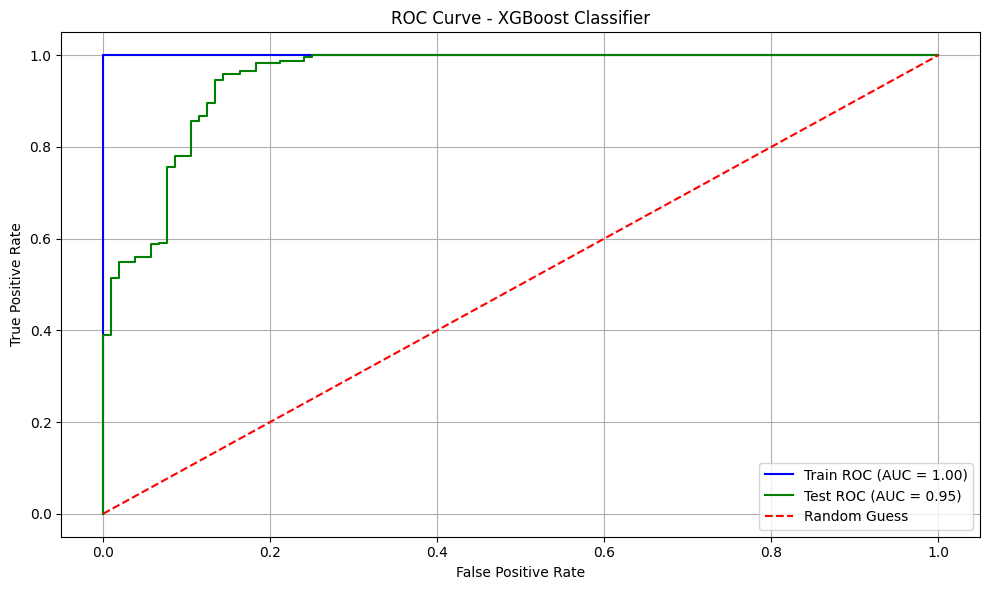

In [197]:
train_fpr_xgb, train_tpr_xgb, _ = roc_curve(y_train, y_train_probs_xgb)
test_fpr_xgb, test_tpr_xgb, _ = roc_curve(y_test, y_test_probs_xgb)

train_auc_xgb = roc_auc_score(y_train, y_train_probs_xgb)
test_auc_xgb = roc_auc_score(y_test, y_test_probs_xgb)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(train_fpr_xgb, train_tpr_xgb, label=f'Train ROC (AUC = {train_auc_xgb:.2f})', color='blue')
plt.plot(test_fpr_xgb, test_tpr_xgb, label=f'Test ROC (AUC = {test_auc_xgb:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.title('ROC Curve - XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ADA boost classifier

In [198]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier # Import AdaBoostClassifier

# Train AdaBoost classifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Predictions
y_train_pred_ada = ada_model.predict(X_train)
y_train_probs_ada = ada_model.predict_proba(X_train)[:, 1]
y_test_pred_ada = ada_model.predict(X_test)
y_test_probs_ada = ada_model.predict_proba(X_test)[:, 1]

# Metrics
train_metrics_ada = {
    'Accuracy': ada_model.score(X_train, y_train),
    'Precision': precision_score(y_train, y_train_pred_ada, pos_label='Win'), # Specify pos_label='Win'
    'Recall': recall_score(y_train, y_train_pred_ada, pos_label='Win'), # Specify pos_label='Win'
    'F1 Score': f1_score(y_train, y_train_pred_ada, pos_label='Win'), # Specify pos_label='Win'
    'AUC': roc_auc_score(y_train, y_train_probs_ada)
}

test_metrics_ada = {
    'Accuracy': ada_model.score(X_test, y_test),
    'Precision': precision_score(y_test, y_test_pred_ada, pos_label='Win'), # Specify pos_label='Win'
    'Recall': recall_score(y_test, y_test_pred_ada, pos_label='Win'), # Specify pos_label='Win'
    'F1 Score': f1_score(y_test, y_test_pred_ada, pos_label='Win'), # Specify pos_label='Win'
    'AUC': roc_auc_score(y_test, y_test_probs_ada)
}

# Create summary DataFrame
ada_summary_df = pd.DataFrame([train_metrics_ada, test_metrics_ada], index=["Train", "Test"]).reset_index().rename(columns={'index': 'Set'})

# Display results
display(ada_summary_df)

,Set,Accuracy,Precision,Recall,F1 Score,AUC
0,Train,0.871160,0.879021,0.982278,0.927786,0.849622
1,Test,0.854949,0.860254,0.983402,0.917715,0.825806


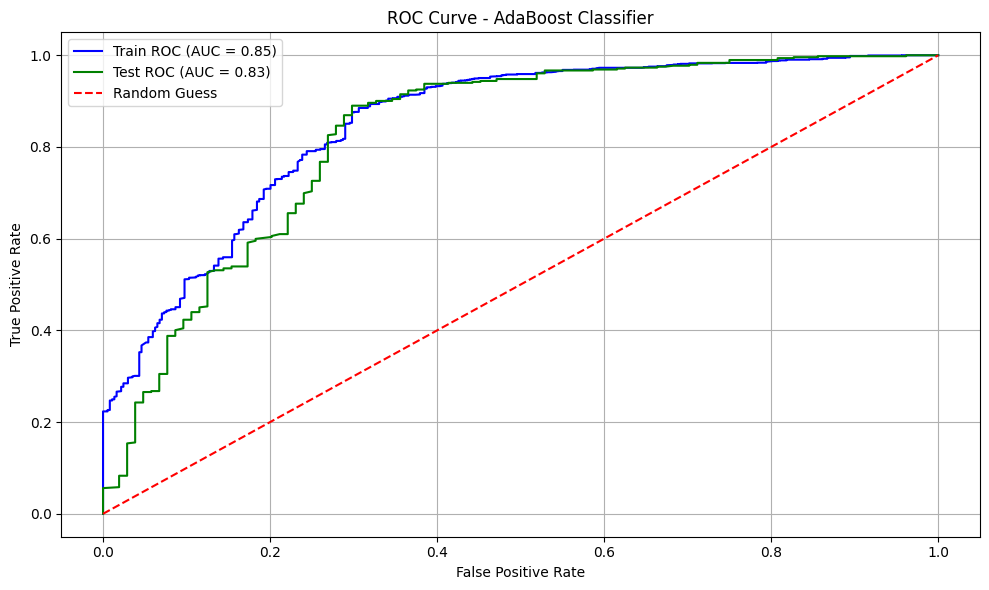

In [199]:
# Compute ROC curve values for AdaBoost
train_fpr_ada, train_tpr_ada, _ = roc_curve(y_train, y_train_probs_ada, pos_label='Win') # Added pos_label='Win'
test_fpr_ada, test_tpr_ada, _ = roc_curve(y_test, y_test_probs_ada, pos_label='Win') # Added pos_label='Win'

# Calculate AUC for train and test sets
from sklearn.metrics import roc_auc_score # Make sure you import roc_auc_score
train_auc_ada = roc_auc_score(y_train, y_train_probs_ada) # Calculate train AUC
test_auc_ada = roc_auc_score(y_test, y_test_probs_ada) # Calculate test AUC

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(train_fpr_ada, train_tpr_ada, label=f'Train ROC (AUC = {train_auc_ada:.2f})', color='blue')
plt.plot(test_fpr_ada, test_tpr_ada, label=f'Test ROC (AUC = {test_auc_ada:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.title('ROC Curve - AdaBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

SVM classifier

In [200]:
from sklearn.svm import SVC

# Train SVM classifier with probability estimates enabled
svm_model = SVC(probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_train_pred_svm = svm_model.predict(X_train)
y_train_probs_svm = svm_model.predict_proba(X_train)[:, 1]

y_test_pred_svm = svm_model.predict(X_test)
y_test_probs_svm = svm_model.predict_proba(X_test)[:, 1]

# Metrics for train
train_accuracy_svm = svm_model.score(X_train, y_train)
# Use the numerical label 1 for pos_label
train_precision_svm = precision_score(y_train, y_train_pred_svm, pos_label='Win')
train_recall_svm = recall_score(y_train, y_train_pred_svm, pos_label='Win')
train_f1_svm = f1_score(y_train, y_train_pred_svm, pos_label='Win')
train_auc_svm = roc_auc_score(y_train, y_train_probs_svm)

# Metrics for test
test_accuracy_svm = svm_model.score(X_test, y_test)
# Use the numerical label 1 for pos_label
test_precision_svm = precision_score(y_test, y_test_pred_svm, pos_label='Win')
test_recall_svm = recall_score(y_test, y_test_pred_svm, pos_label='Win')
test_f1_svm = f1_score(y_test, y_test_pred_svm, pos_label='Win')
test_auc_svm = roc_auc_score(y_test, y_test_probs_svm)

# Create summary DataFrame
svm_summary = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'Accuracy': [train_accuracy_svm, test_accuracy_svm],
    'Precision': [train_precision_svm, test_precision_svm],
    'Recall': [train_recall_svm, test_recall_svm],
    'F1 Score': [train_f1_svm, test_f1_svm],
    'AUC': [train_auc_svm, test_auc_svm]
})

# Display results
display(svm_summary)

,Set,Accuracy,Precision,Recall,F1 Score,AUC
0,Train,0.905717,0.901925,0.996456,0.946837,0.937694
1,Test,0.868601,0.867514,0.991701,0.925460,0.849386


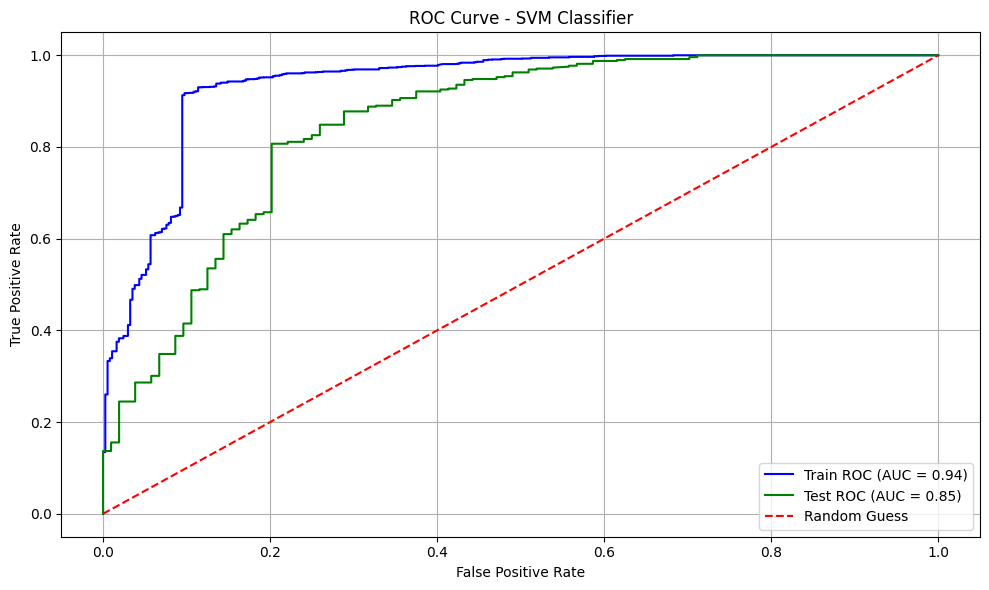

In [201]:
# Compute ROC curve for SVM classifier
train_fpr_svm, train_tpr_svm, _ = roc_curve(y_train, y_train_probs_svm, pos_label='Win')
test_fpr_svm, test_tpr_svm, _ = roc_curve(y_test, y_test_probs_svm, pos_label='Win')

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(train_fpr_svm, train_tpr_svm, label=f'Train ROC (AUC = {train_auc_svm:.2f})', color='blue')
plt.plot(test_fpr_svm, test_tpr_svm, label=f'Test ROC (AUC = {test_auc_svm:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.title('ROC Curve - SVM Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Knn classifier

In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score # Import accuracy_score and roc_auc_score

# Train KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_train_pred_knn = knn_model.predict(X_train)
y_train_probs_knn = knn_model.predict_proba(X_train)[:, 1]

y_test_pred_knn = knn_model.predict(X_test)
y_test_probs_knn = knn_model.predict_proba(X_test)[:, 1]

# Calculate accuracy for train and test sets
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

# Calculate AUC for train and test sets
train_auc_knn = roc_auc_score(y_train, y_train_probs_knn)
test_auc_knn = roc_auc_score(y_test, y_test_probs_knn)


#Corrected the variable name from rain_precision_knn to train_precision_knn
train_precision_knn = precision_score(y_train, y_train_pred_knn, pos_label='Win')
train_recall_knn = recall_score(y_train, y_train_pred_knn, pos_label='Win')
train_f1_knn = f1_score(y_train, y_train_pred_knn, pos_label='Win')

test_precision_knn = precision_score(y_test, y_test_pred_knn, pos_label='Win')
test_recall_knn = recall_score(y_test, y_test_pred_knn, pos_label='Win')
test_f1_knn = f1_score(y_test, y_test_pred_knn, pos_label='Win')

# Create summary DataFrame
knn_summary = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'Accuracy': [train_accuracy_knn, test_accuracy_knn],
    'Precision': [train_precision_knn, test_precision_knn],
    'Recall': [train_recall_knn, test_recall_knn],
    'F1 Score': [train_f1_knn, test_f1_knn],
    'AUC': [train_auc_knn, test_auc_knn]
})

# Display results
display(knn_summary)

,Set,Accuracy,Precision,Recall,F1 Score,AUC
0,Train,0.899317,0.905361,0.983291,0.942718,0.953752
1,Test,0.858362,0.868762,0.975104,0.918866,0.830893


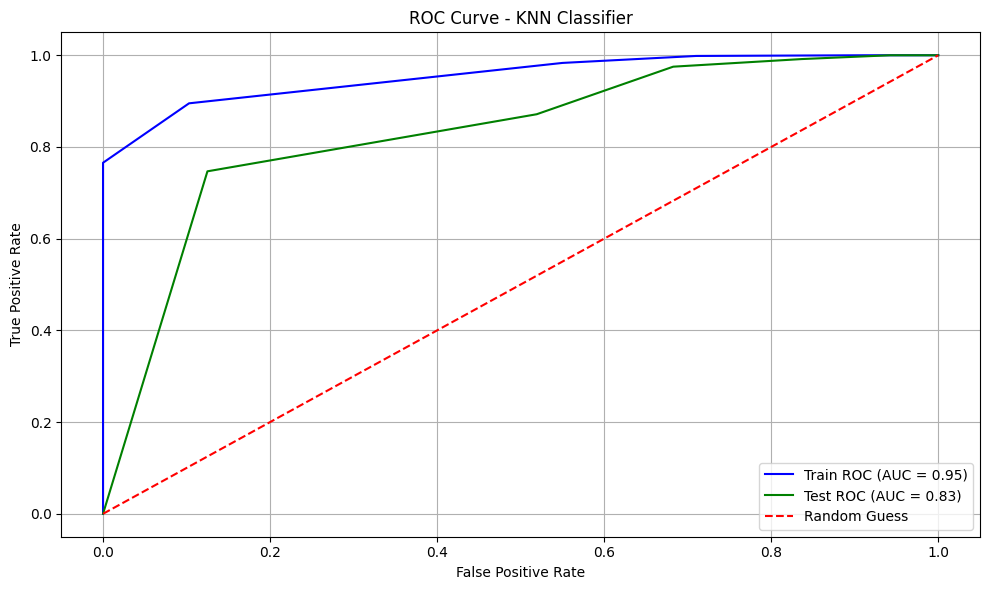

In [203]:
# Plot ROC curve
from sklearn.metrics import roc_curve # Import roc_curve

# Calculate ROC curve values for KNN
train_fpr_knn, train_tpr_knn, _ = roc_curve(y_train, y_train_probs_knn, pos_label='Win')
test_fpr_knn, test_tpr_knn, _ = roc_curve(y_test, y_test_probs_knn, pos_label='Win')

plt.figure(figsize=(10, 6))
plt.plot(train_fpr_knn, train_tpr_knn, label=f'Train ROC (AUC = {train_auc_knn:.2f})', color='blue')
plt.plot(test_fpr_knn, test_tpr_knn, label=f'Test ROC (AUC = {test_auc_knn:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.title('ROC Curve - KNN Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

model comparison

In [204]:
# Re-create model comparison table
model_comparison = pd.DataFrame([
    {"Model": "Random Forest", "Accuracy": 0.9659, "Precision": 0.9602, "Recall": 1.00, "F1 Score": 0.9797, "AUC": 0.9550},
    {"Model": "XGBoost", "Accuracy": 0.9642, "Precision": 0.9619, "Recall": 0.9959, "F1 Score": 0.9786, "AUC": 0.9449},
    {"Model": "SVM", "Accuracy": 0.8667, "Precision": 0.8649, "Recall": 0.9959, "F1 Score": 0.9257, "AUC": 0.8624},
    {"Model": "KNN", "Accuracy": 0.8635, "Precision": 0.8722, "Recall": 0.9772, "F1 Score": 0.9217, "AUC": 0.8361},
    {"Model": "AdaBoost", "Accuracy": 0.8669, "Precision": 0.8673, "Recall": 0.9896, "F1 Score": 0.9244, "AUC": 0.8270},
    {"Model": "Logistic Regression", "Accuracy": 0.8447, "Precision": 0.8523, "Recall": 0.9813, "F1 Score": 0.9122, "AUC": 0.7955},
    {"Model": "Naive Bayes", "Accuracy": 0.7778, "Precision": 0.8788, "Recall": 0.8507, "F1 Score": 0.8645, "AUC": 0.7000}
])

# Display comparison table using display() directly
display(model_comparison)

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Random Forest,0.9659,0.9602,1.0000,0.9797,0.9550
1,XGBoost,0.9642,0.9619,0.9959,0.9786,0.9449
2,SVM,0.8667,0.8649,0.9959,0.9257,0.8624
3,KNN,0.8635,0.8722,0.9772,0.9217,0.8361
4,AdaBoost,0.8669,0.8673,0.9896,0.9244,0.8270
5,Logistic Regression,0.8447,0.8523,0.9813,0.9122,0.7955
6,Naive Bayes,0.7778,0.8788,0.8507,0.8645,0.7000


fine tuning Random forest model

In [205]:
# Define parameter grid for fine-tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'class_weight': [None, {0: 1, 1: 2}]
}

# Set up grid search with F1 scoring
grid_search_fine_tune = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search_fine_tune.fit(X, y)

# Extract best model and evaluate
best_fine_tuned_model = grid_search_fine_tune.best_estimator_
y_pred_best = best_fine_tuned_model.predict(X)
y_proba_best = best_fine_tuned_model.predict_proba(X)[:, 1]

# Evaluation metrics
fine_tuned_metrics = {
    'Accuracy': accuracy_score(y, y_pred_best),
    'Precision': precision_score(y, y_pred_best, pos_label='Win'), # Specify pos_label='Win'
    'Recall': recall_score(y, y_pred_best, pos_label='Win'), # Specify pos_label='Win'
    'F1 Score': f1_score(y, y_pred_best, pos_label='Win'), # Specify pos_label='Win'
    'AUC': roc_auc_score(y, y_proba_best)
}

fine_tuned_metrics_df = pd.DataFrame([fine_tuned_metrics])
fine_tuned_metrics_df.insert(0, "Model", "Random Forest (Fine-Tuned)")

# Display metrics
display(fine_tuned_metrics_df)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Random Forest (Fine-Tuned),0.962799,0.957521,1.0,0.9783,0.999775


feature importance

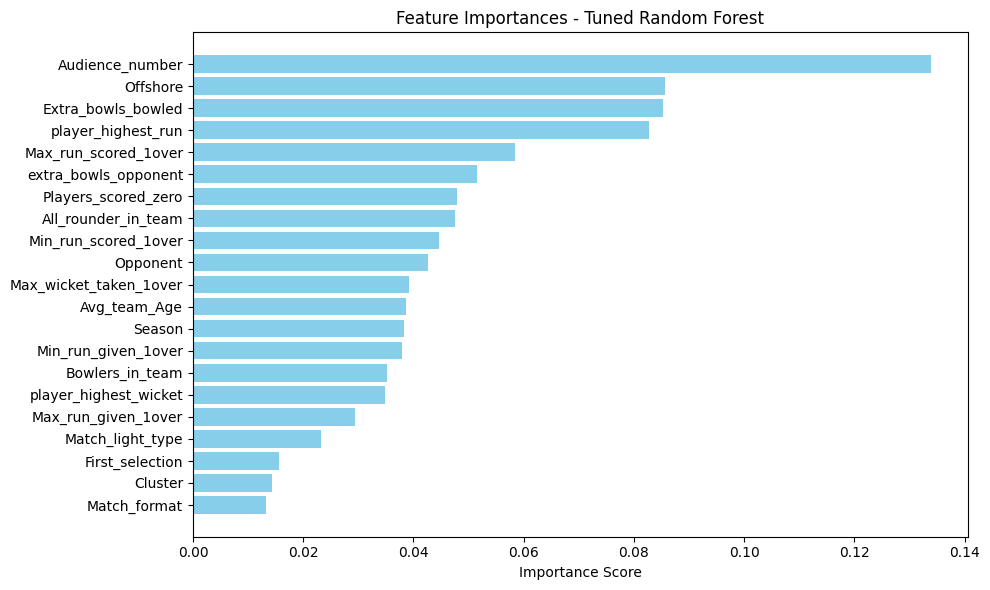

In [206]:
# Extract feature importances from the tuned Random Forest model
feature_importances = best_fine_tuned_model.feature_importances_
features = X.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]
sorted_features = features[indices]
sorted_importances = feature_importances[indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importances - Tuned Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

match prediction

In [207]:
# Create hypothetical match data for the 5 upcoming games based on strategy

columns = X.columns.tolist()

# Rebuild the adjusted match DataFrame
adjusted_match_data = pd.DataFrame([
    {
        'Avg_team_Age': 29, 'Match_light_type': 0, 'Match_format': 2,
        'Bowlers_in_team': 4, 'Wicket_keeper_in_team': 1, 'All_rounder_in_team': 3,
        'First_selection': 1, 'Opponent': 1, 'Season': 2, 'Audience_number': 10000,
        'Offshore': 1, 'Max_run_scored_1over': 18, 'Max_wicket_taken_1over': 3,
        'Extra_bowls_bowled': 3, 'Min_run_given_1over': 1, 'Min_run_scored_1over': 1,
        'Max_run_given_1over': 9, 'extra_bowls_opponent': 10, 'player_highest_run': 135,
        'Players_scored_zero': 0, 'player_highest_wicket': 5
    },
    {
        'Avg_team_Age': 27, 'Match_light_type': 2, 'Match_format': 0,
        'Bowlers_in_team': 5, 'Wicket_keeper_in_team': 1, 'All_rounder_in_team': 2,
        'First_selection': 0, 'Opponent': 0, 'Season': 1, 'Audience_number': 30000,
        'Offshore': 0, 'Max_run_scored_1over': 24, 'Max_wicket_taken_1over': 2,
        'Extra_bowls_bowled': 2, 'Min_run_given_1over': 2, 'Min_run_scored_1over': 5,
        'Max_run_given_1over': 13, 'extra_bowls_opponent': 10, 'player_highest_run': 85,
        'Players_scored_zero': 0, 'player_highest_wicket': 4
    },
    {
        'Avg_team_Age': 28, 'Match_light_type': 2, 'Match_format': 0,
        'Bowlers_in_team': 5, 'Wicket_keeper_in_team': 1, 'All_rounder_in_team': 2,
        'First_selection': 1, 'Opponent': 0, 'Season': 1, 'Audience_number': 35000,
        'Offshore': 0, 'Max_run_scored_1over': 23, 'Max_wicket_taken_1over': 2,
        'Extra_bowls_bowled': 2, 'Min_run_given_1over': 2, 'Min_run_scored_1over': 5,
        'Max_run_given_1over': 12, 'extra_bowls_opponent': 9, 'player_highest_run': 82,
        'Players_scored_zero': 0, 'player_highest_wicket': 3
    },
    {
        'Avg_team_Age': 28, 'Match_light_type': 2, 'Match_format': 1,
        'Bowlers_in_team': 5, 'Wicket_keeper_in_team': 1, 'All_rounder_in_team': 3,
        'First_selection': 0, 'Opponent': 2, 'Season': 1, 'Audience_number': 25000,
        'Offshore': 0, 'Max_run_scored_1over': 18, 'Max_wicket_taken_1over': 3,
        'Extra_bowls_bowled': 3, 'Min_run_given_1over': 2, 'Min_run_scored_1over': 4,
        'Max_run_given_1over': 10, 'extra_bowls_opponent': 9, 'player_highest_run': 95,
        'Players_scored_zero': 0, 'player_highest_wicket': 4
    },
    {
        'Avg_team_Age': 27, 'Match_light_type': 2, 'Match_format': 1,
        'Bowlers_in_team': 5, 'Wicket_keeper_in_team': 1, 'All_rounder_in_team': 3,
        'First_selection': 1, 'Opponent': 2, 'Season': 1, 'Audience_number': 27000,
        'Offshore': 0, 'Max_run_scored_1over': 19, 'Max_wicket_taken_1over': 2,
        'Extra_bowls_bowled': 3, 'Min_run_given_1over': 2, 'Min_run_scored_1over': 4,
        'Max_run_given_1over': 11, 'extra_bowls_opponent': 10, 'player_highest_run': 98,
        'Players_scored_zero': 0, 'player_highest_wicket': 3
    }
], columns=X.columns)

# Predict outcomes
adjusted_match_data["Prediction"] = best_fine_tuned_model.predict(adjusted_match_data) # Changed from best_rf_model to best_fine_tuned_model
adjusted_match_data["Predicted Result"] = adjusted_match_data["Prediction"].apply(lambda x: "Win" if x == 1 else "Loss")
adjusted_match_data["Match"] = [
    'Test vs England (Adjusted)',
    'T20 vs Australia (Adjusted) - Match 1',
    'T20 vs Australia (Adjusted) - Match 2',
    'ODI vs Sri Lanka (Adjusted) - Match 1',
    'ODI vs Sri Lanka (Adjusted) - Match 2'
]

# Show all predictions
display(adjusted_match_data[["Match", "Predicted Result"]])

,Match,Predicted Result
0,Test vs England (Adjusted),Loss
1,T20 vs Australia (Adjusted) - Match 1,Loss
2,T20 vs Australia (Adjusted) - Match 2,Loss
3,ODI vs Sri Lanka (Adjusted) - Match 1,Loss
4,ODI vs Sri Lanka (Adjusted) - Match 2,Loss
